In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd 

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
df = pd.read_csv('../data/processed/complete_merged.csv')

In [70]:
# Basic information about the merged dataset
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (696, 79)

Column Information:
Country                                                                                                     object
Year                                                                                                       float64
Agricultural production index (2014-2016=100)                                                              float64
Balance of payments, current account (million US$)                                                         float64
CPI: Consumer Price Index (2010=100)                                                                       float64
Economy: Agriculture (% of Gross Value Added)                                                              float64
Economy: Industry (% of Gross Value Added)                                                                 float64
Economy: Services and other activity (% of GVA)                                                            float64
Employment in agriculture (% of em

In [71]:
# Descriptive statistics for numerical variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Descriptive Statistics for Numerical Variables:")
df[numeric_cols].describe()

Descriptive Statistics for Numerical Variables:


/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Year  Agricultural production index (2014-2016=100)  \
count   696.000000                                     594.000000   
mean   2019.666667                                     105.727273   
std       3.684435                                      15.708872   
min    2015.000000                                      64.000000   
25%    2015.000000                                      99.000000   
50%    2020.000000                                     102.000000   
75%    2024.000000                                     112.000000   
max    2024.000000                                     220.000000   

       Balance of payments, current account (million US$)  \
count                                         562.000000    
mean                                        14418.112100    
std                                         55979.475881    
min                                             0.000000    
25%                                           331.000000    
50%                                          1509.000000    
75%                                          6107.000000    
max                                        818822.000000    

       CPI: Consumer Price Index (2010=100)  \
count                            586.000000   
mean                             539.167235   
std                             4690.865029   
min                               88.000000   
25%                              111.000000   
50%                              127.000000   
75%                              155.000000   
max                            93584.000000   

       Economy: Agriculture (% of Gross Value Added)  \
count                                     621.000000   
mean                                       11.336071   
std                                        11.960299   
min                                         0.000000   
25%                                         2.400000   
50%                                         7.600000   
75%                                        18.000000   
max                                        75.600000   

       Economy: Industry (% of Gross Value Added)  \
count                                  630.000000   
mean                                    26.722381   
std                                     11.619798   
min                                      4.500000   
25%                                     18.425000   
50%                                     25.800000   
75%                                     33.675000   
max                                     69.800000   

       Economy: Services and other activity (% of GVA)  \
count                                       630.000000   
mean                                         62.090635   
std                                          14.917319   
min                                          16.400000   
25%                                          52.325000   
50%                                          61.200000   
75%                                          72.875000   
max                                          94.500000   

       Employment in agriculture (% of employed)  \
count                                 578.000000   
mean                                   23.210727   
std                                    21.462605   
min                                     0.100000   
25%                                     4.125000   
50%                                    16.700000   
75%                                    36.575000   
max                                    86.300000   

       Employment in industry (% of employed)  \
count                              579.000000   
mean                                19.493264   
std                                  7.646032   
min                                  3.100000   
25%                                 14.300000   
50%                                 19.200000   
75%                                 24.000000   
max                                 54.100000   

 

In [72]:
df["Life expectancy at birth - average"] = (df["Life expectancy at birth - Female (years)"] + df["Life expectancy at birth - Male (years)"])/2
df.head()

Country    Year  Agricultural production index (2014-2016=100)  \
0  Afghanistan  2015.0                                           96.0   
1  Afghanistan  2020.0                                          112.0   
2  Afghanistan  2024.0                                          111.0   
3      Albania  2015.0                                          100.0   
4      Albania  2020.0                                          106.0   

   Balance of payments, current account (million US$)  \
0                                             4193.0    
1                                             3137.0    
2                                                NaN    
3                                              980.0    
4                                             1315.0    

   CPI: Consumer Price Index (2010=100)  \
0                                 133.0   
1                                 150.0   
2                                   NaN   
3                                 111.0   
4                                 121.0   

   Economy: Agriculture (% of Gross Value Added)  \
0                                           22.0   
1                                           31.4   
2                                           35.5   
3                                           22.5   
4                                           21.9   

   Economy: Industry (% of Gross Value Added)  \
0                                         9.6   
1                                        13.6   
2                                        16.9   
3                                        24.8   
4                                        22.9   

   Economy: Services and other activity (% of GVA)  \
0                                             68.3   
1                                             55.0   
2                                             47.5   
3                                             52.7   
4                                             55.1   

   Employment in agriculture (% of employed)  \
0                                       44.6   
1                                       46.0   
2                                       46.6   
3                                       41.3   
4                                       36.2   

   Employment in industry (% of employed)  \
0                                    20.7   
1                                    18.5   
2                                    18.3   
3                                    18.7   
4                                    20.6   

   Employment in services (% employed)  \
0                                 34.7   
1                                 35.5   
2                                 35.1   
3                                 40.0   
4                                 43.2   

   GDP growth rate (annual %, const. 2015 prices)  \
0                                             2.5   
1                                             2.1   
2                                             6.2   
3                                             2.2   
4                                             3.5   

   GDP per capita (current US$)  \
0                         554.0   
1                         512.7   
2                         344.6   
3                        3950.4   
4                        5289.0   

   GDP: Gross domestic product (million current US$)  \
0                                            18700.0   
1                                            19983.0   
2                                            14175.0   
3                                            11387.0   
4                                            15163.0   

   International trade: balance (million current US$)  \
0                                             7151.0    
1                                             7484.0    
2                                             4337.0    
3                                             2391.0    
4                                             2995.0    

   Interna

# Análisis Exploratorio de Datos (EDA)

## 1. Análisis de Variables Categóricas

Primero vamos a analizar las variables categóricas del dataset.

In [73]:
# Análisis de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categorical_cols))
print("\n" + "="*50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Valores únicos: {df[col].nunique()}")
    print("Distribución de frecuencias:")
    value_counts = df[col].value_counts()
    print(value_counts.head(10))  # Top 10 most frequent values
    print("-" * 30)

Variables categóricas: ['Country', 'Capital city', 'National currency', 'Region', 'UN membership date']


Country:
Valores únicos: 232
Distribución de frecuencias:
Country
Afghanistan                 3
Panama                      3
New Caledonia               3
New Zealand                 3
Nicaragua                   3
Niger                       3
Nigeria                     3
Niue                        3
North Macedonia             3
Northern Mariana Islands    3
Name: count, dtype: int64
------------------------------

Capital city:
Valores únicos: 232
Distribución de frecuencias:
Capital city
Kabul          3
Panama City    3
Nouméa         3
Wellington     3
Managua        3
Niamey         3
Abuja          3
Alofi          3
Skopje         3
Garapan        3
Name: count, dtype: int64
------------------------------

National currency:
Valores únicos: 156
Distribución de frecuencias:
National currency
Euro (EUR)                    93
US Dollar (USD)               45
E. Caribbean D

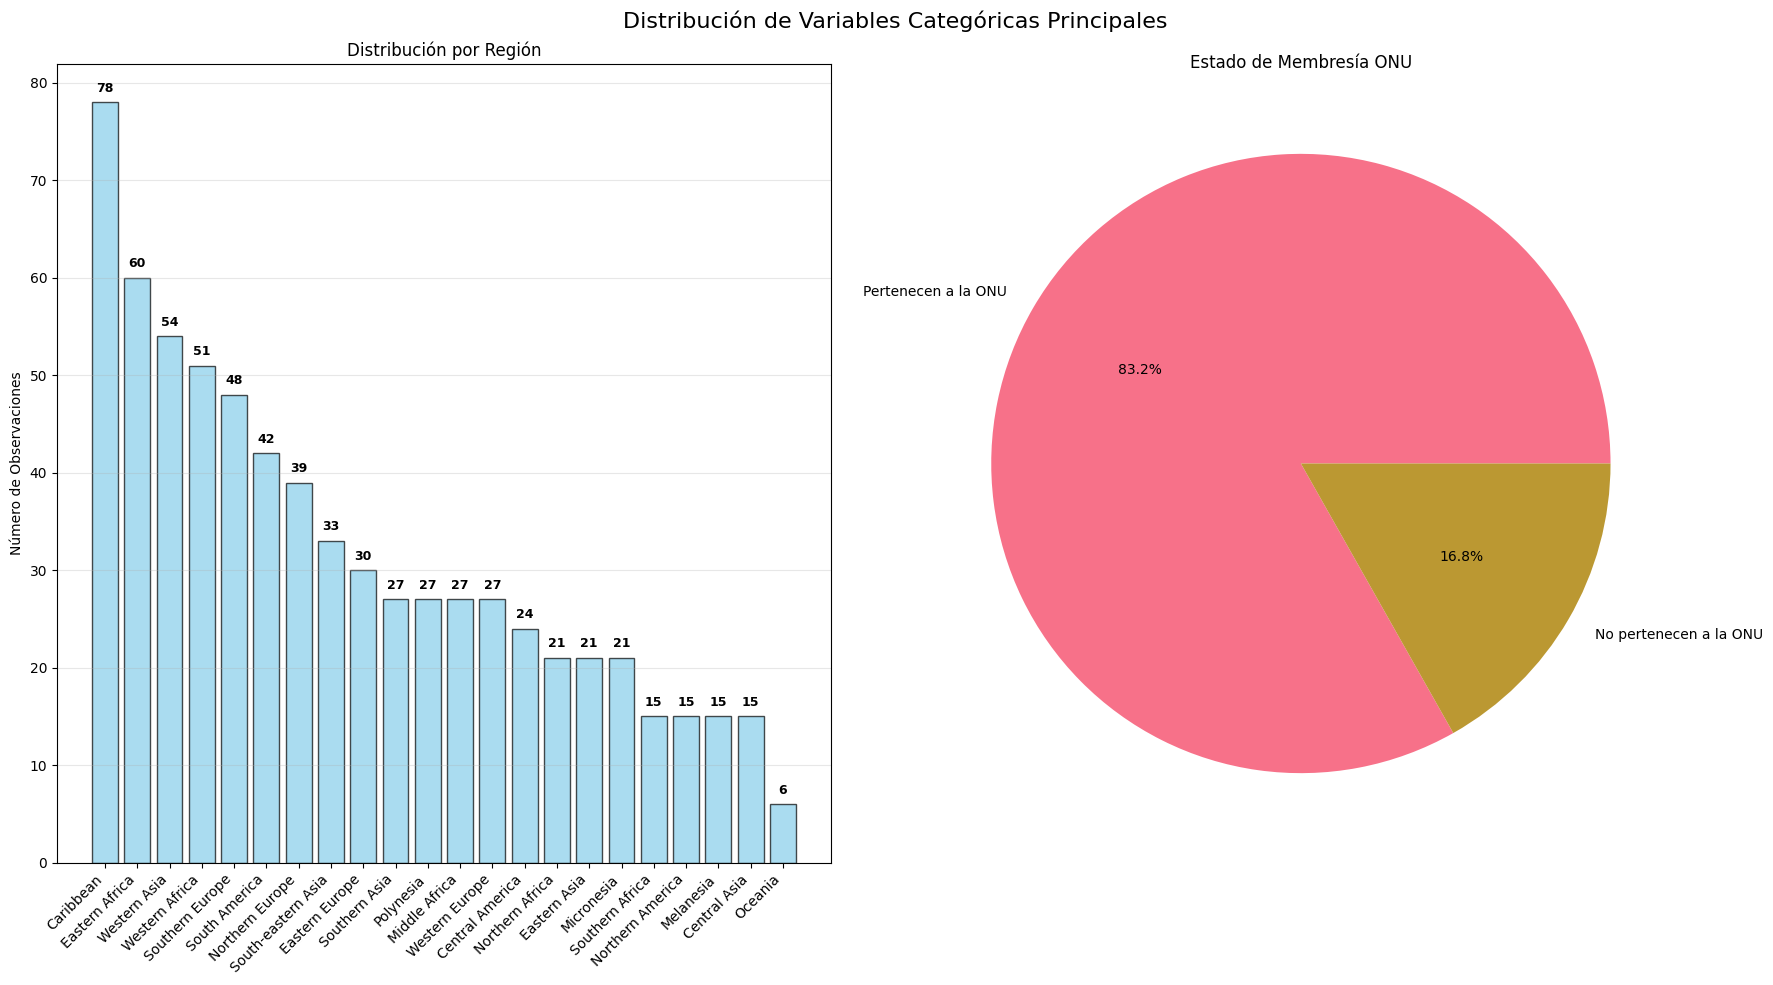

In [74]:
# Visualización de variables categóricas importantes
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribución de Variables Categóricas Principales', fontsize=16)

# Región - Bar Plot
region_counts = df['Region'].value_counts()
axes[0].bar(range(len(region_counts)), region_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(region_counts)))
axes[0].set_xticklabels(region_counts.index, rotation=45, ha='right', fontsize=10)
axes[0].set_ylabel('Número de Observaciones')
axes[0].set_title('Distribución por Región')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(region_counts.values):
    axes[0].text(i, v + max(region_counts.values) * 0.01, str(v), 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# UN membership status - This variable tells us whether the country is a member of the UN or not
membership_status = df['UN membership date'].isna().value_counts()
axes[1].pie([membership_status[False], membership_status[True]], 
               labels=['Pertenecen a la ONU', 'No pertenecen a la ONU'], 
               autopct='%1.1f%%')
axes[1].set_title('Estado de Membresía ONU')

plt.tight_layout()
plt.savefig("../src/visualization/categorical_distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## 2. Análisis de Variables Numéricas - Distribuciones

In [75]:
# Seleccionar variables clave para análisis detallado

key_variables = [
    "GDP per capita (current US$)",
    "GDP growth rate (annual %, const. 2015 prices)",
    "Unemployment (% of labour force)",
    "Health: Physicians (per 1 000 pop.)",
    "Life expectancy at birth - average",
    "Intentional homicide rate (per 100 000 pop.)",
    "Health: Current expenditure (% of GDP)"
]

print("Key Variables to Analyze")
for var in key_variables:
    print(f"- {var}")

Key Variables to Analyze
- GDP per capita (current US$)
- GDP growth rate (annual %, const. 2015 prices)
- Unemployment (% of labour force)
- Health: Physicians (per 1 000 pop.)
- Life expectancy at birth - average
- Intentional homicide rate (per 100 000 pop.)
- Health: Current expenditure (% of GDP)


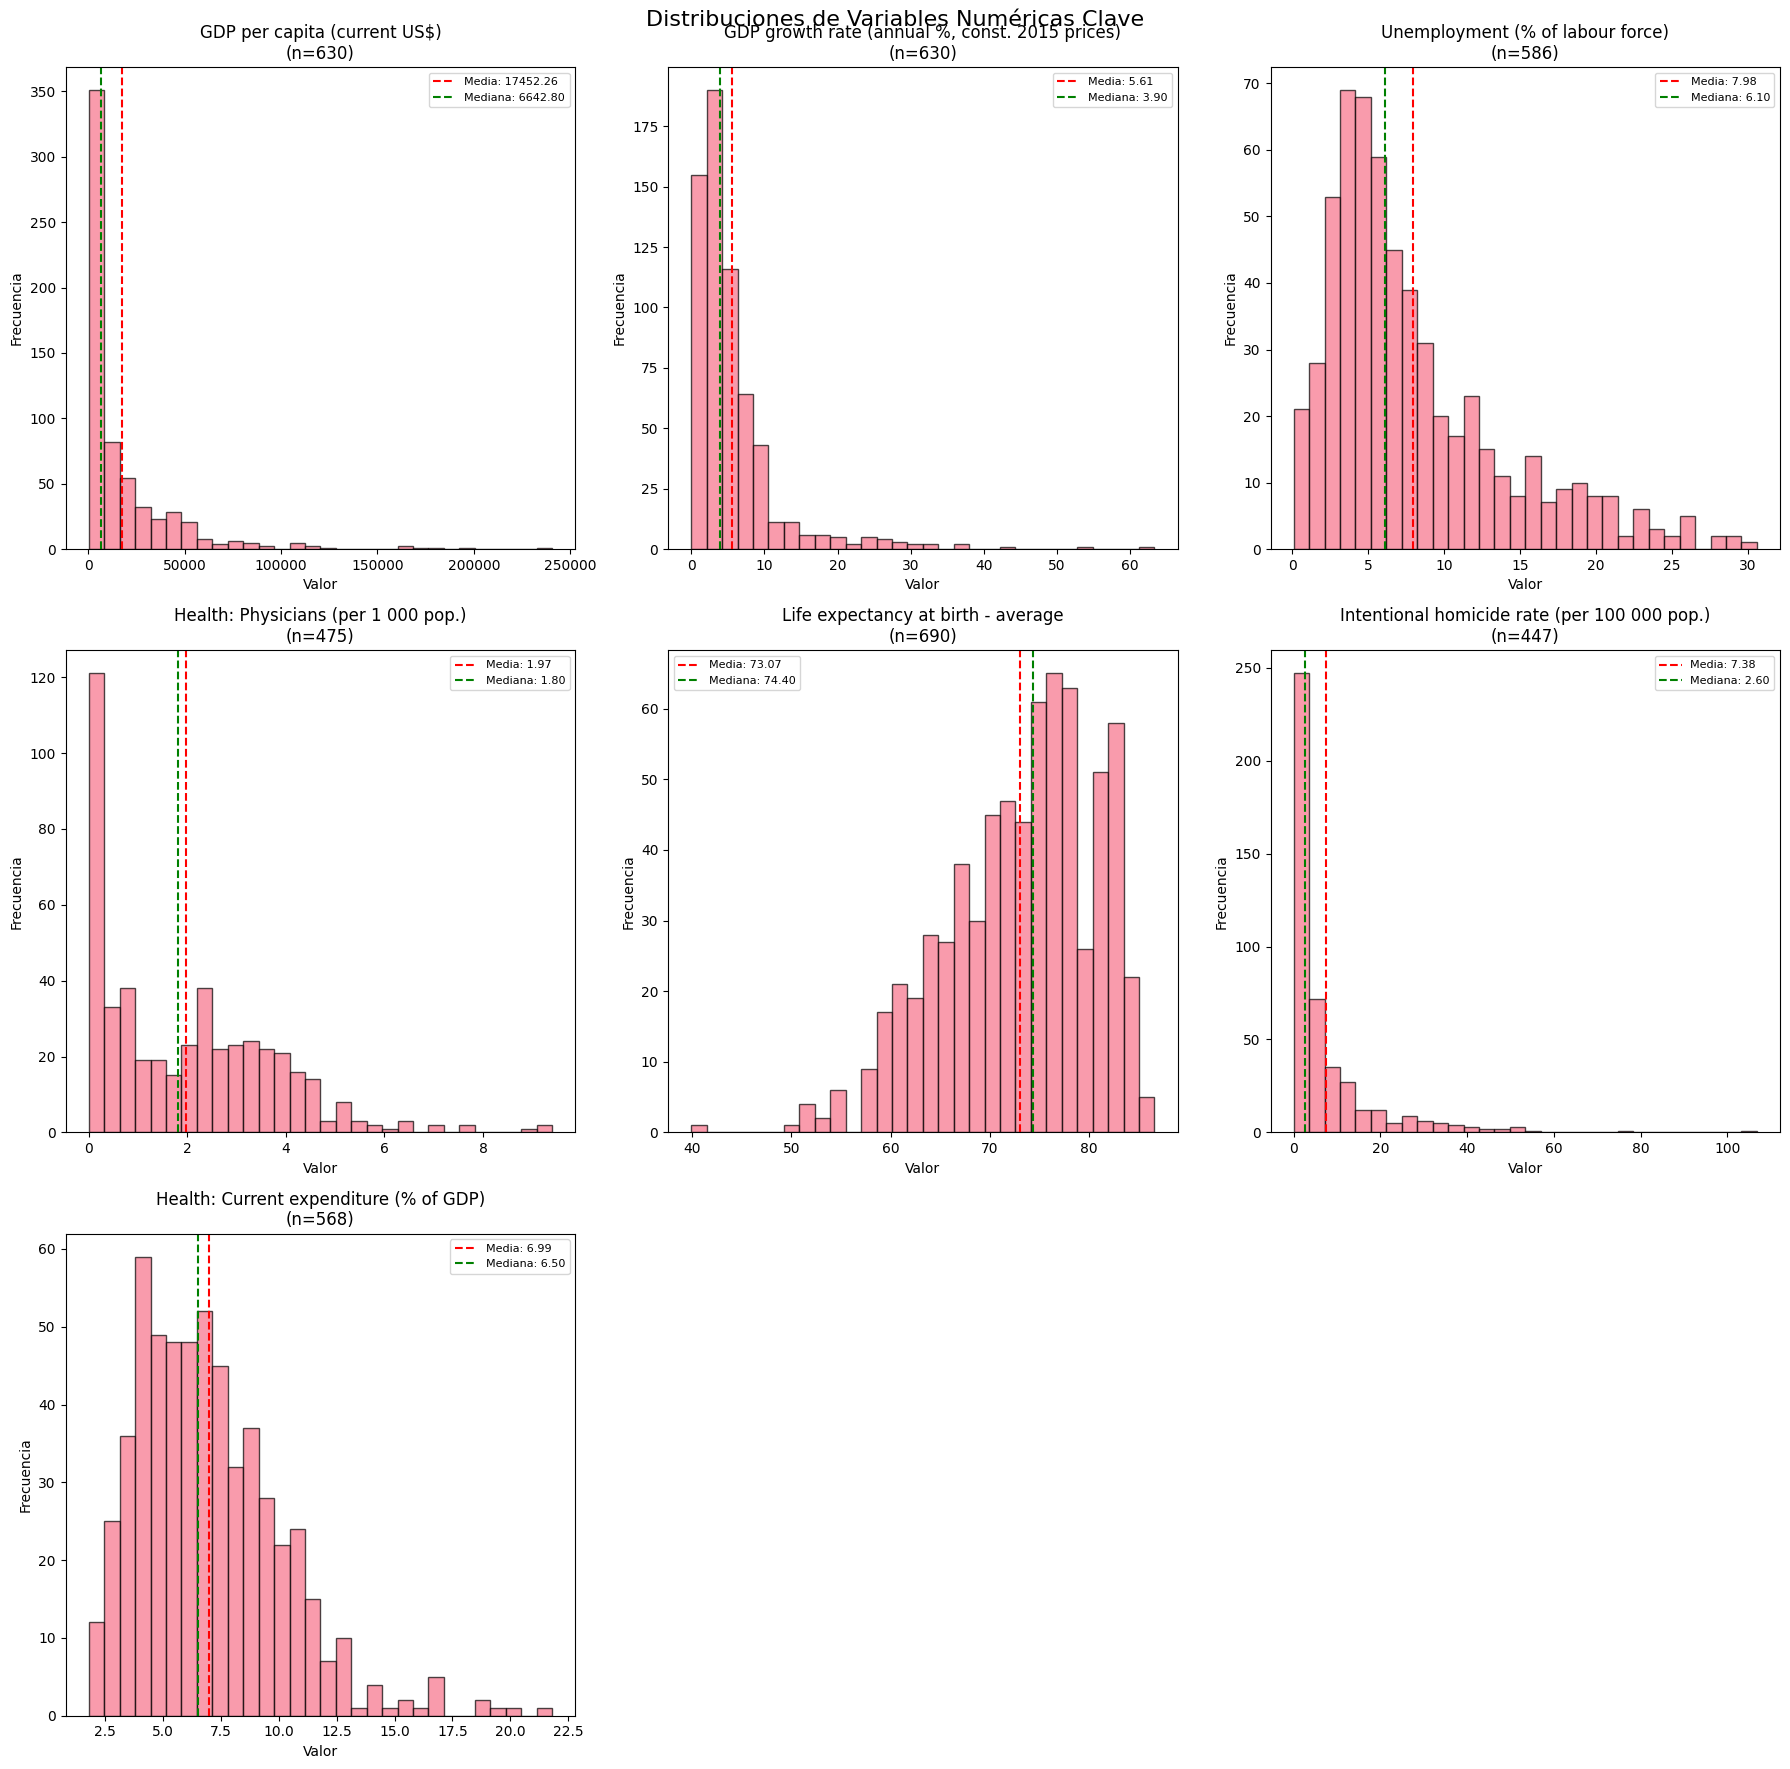

In [76]:
# Histogramas de variables numéricas clave
n_vars = len(key_variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Distribuciones de Variables Numéricas Clave', fontsize=16)

for i, var in enumerate(key_variables):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df[var].dropna()
    
    if len(data) > 0:
        axes[row, col].hist(data, bins=30, alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{var}\n(n={len(data)})')
        axes[row, col].set_xlabel('Valor')
        axes[row, col].set_ylabel('Frecuencia')
        
        # Agregar estadísticas básicas
        mean_val = data.mean()
        median_val = data.median()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[row, col].legend(fontsize=8)
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.savefig("../src/visualization/key_variables_histogram.png", dpi=300,bbox_inches='tight', facecolor='white')
plt.show()

📊 CREANDO VISUALIZACIONES DE TODAS LAS VARIABLES CLAVE POR AÑO
Años disponibles: [np.float64(2015.0), np.float64(2020.0), np.float64(2024.0)]
Variables a visualizar: 7

Procesando 1/7: GDP per capita (current US$)


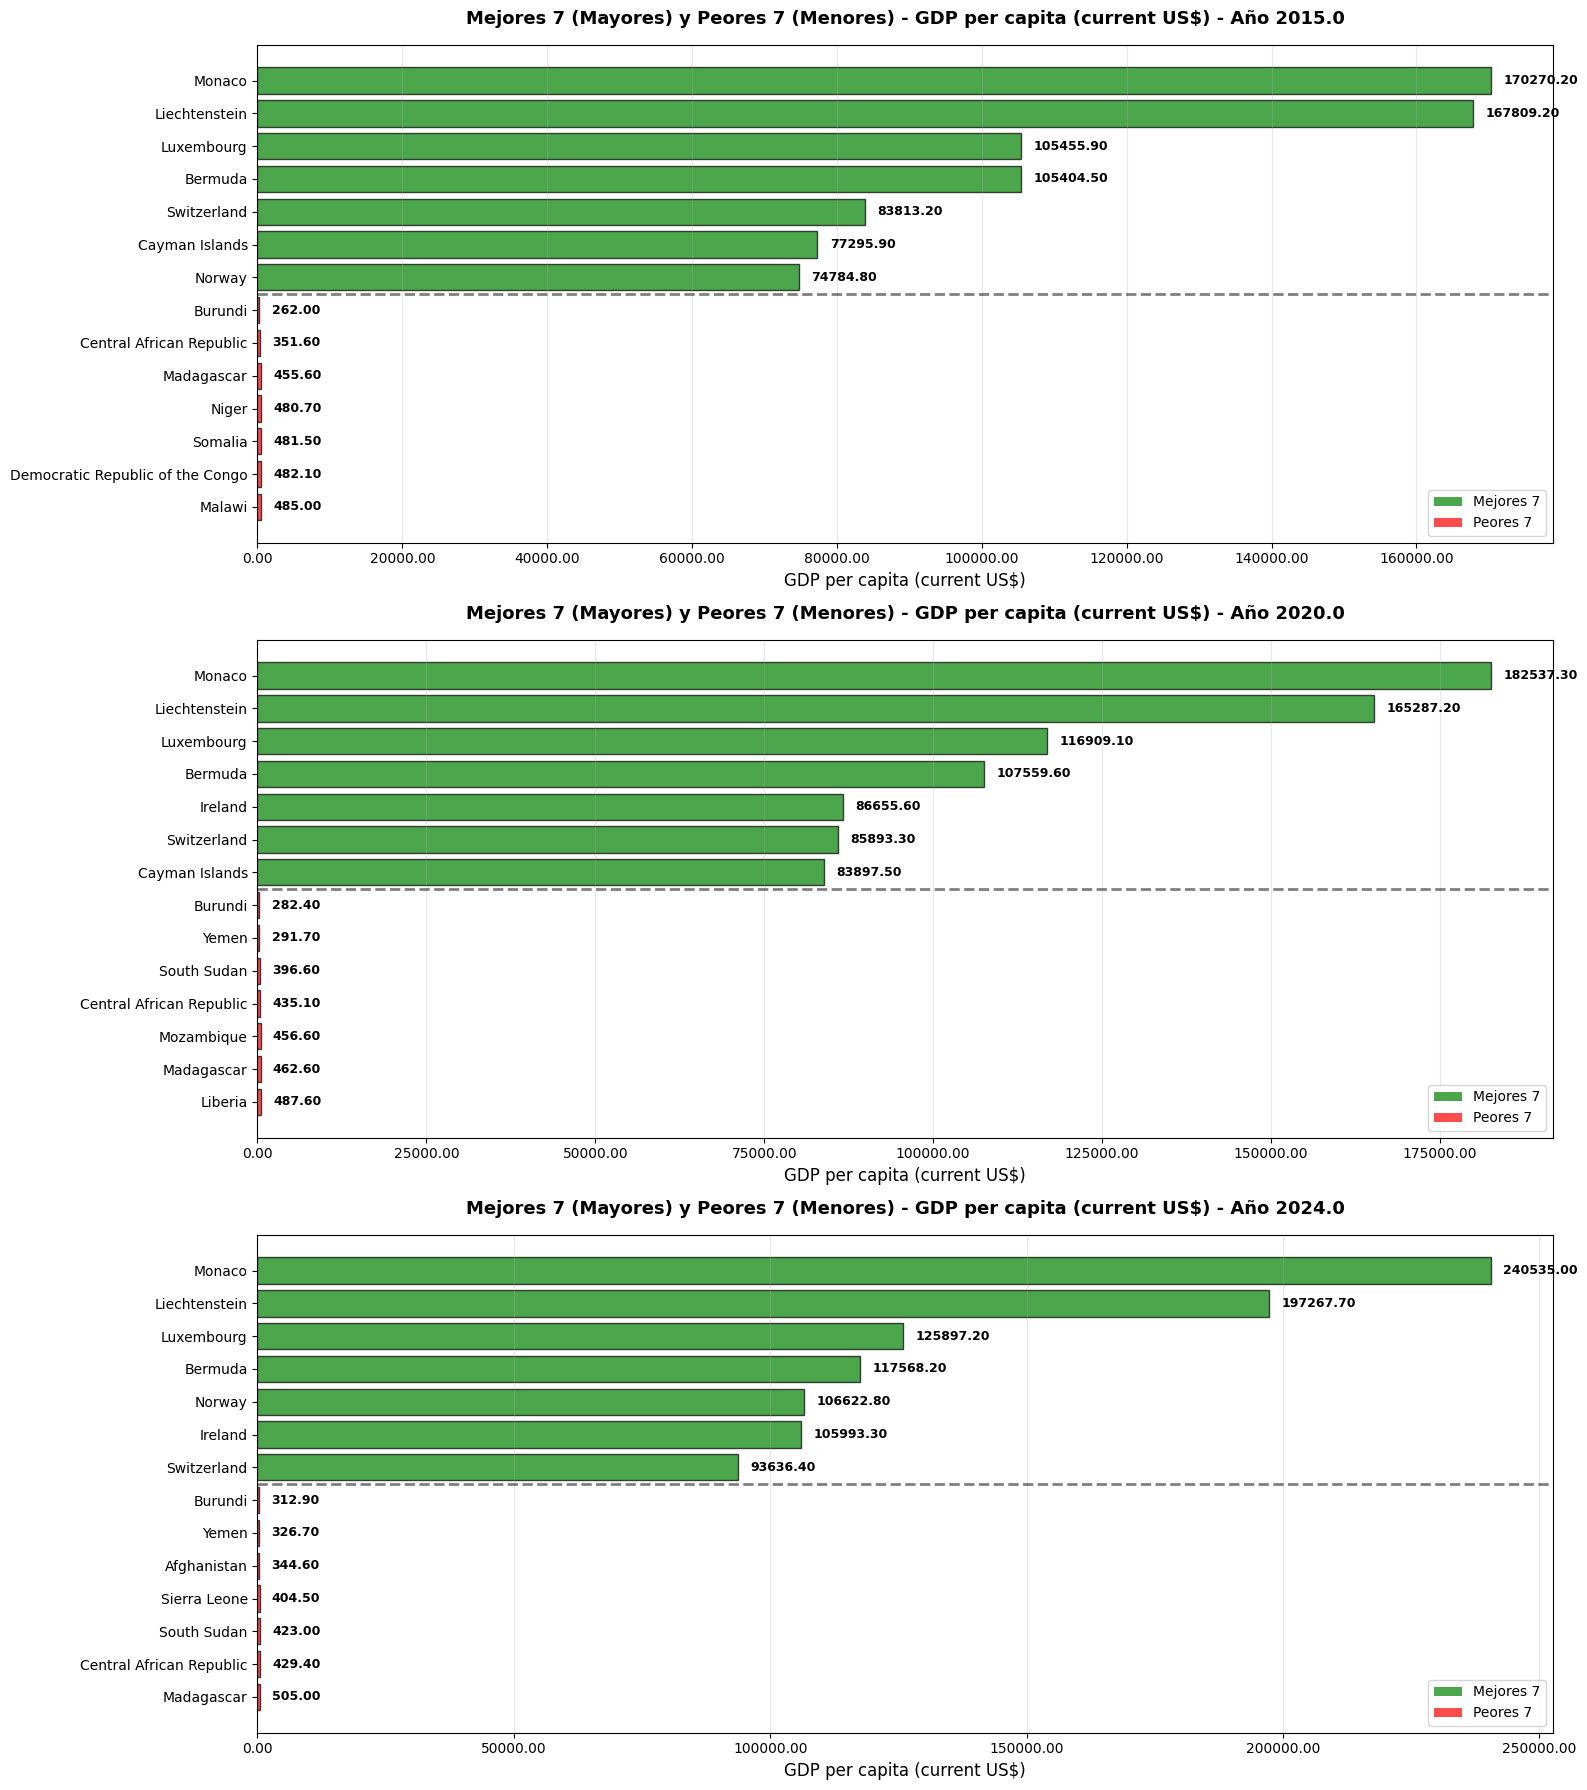


Procesando 2/7: GDP growth rate (annual %, const. 2015 prices)


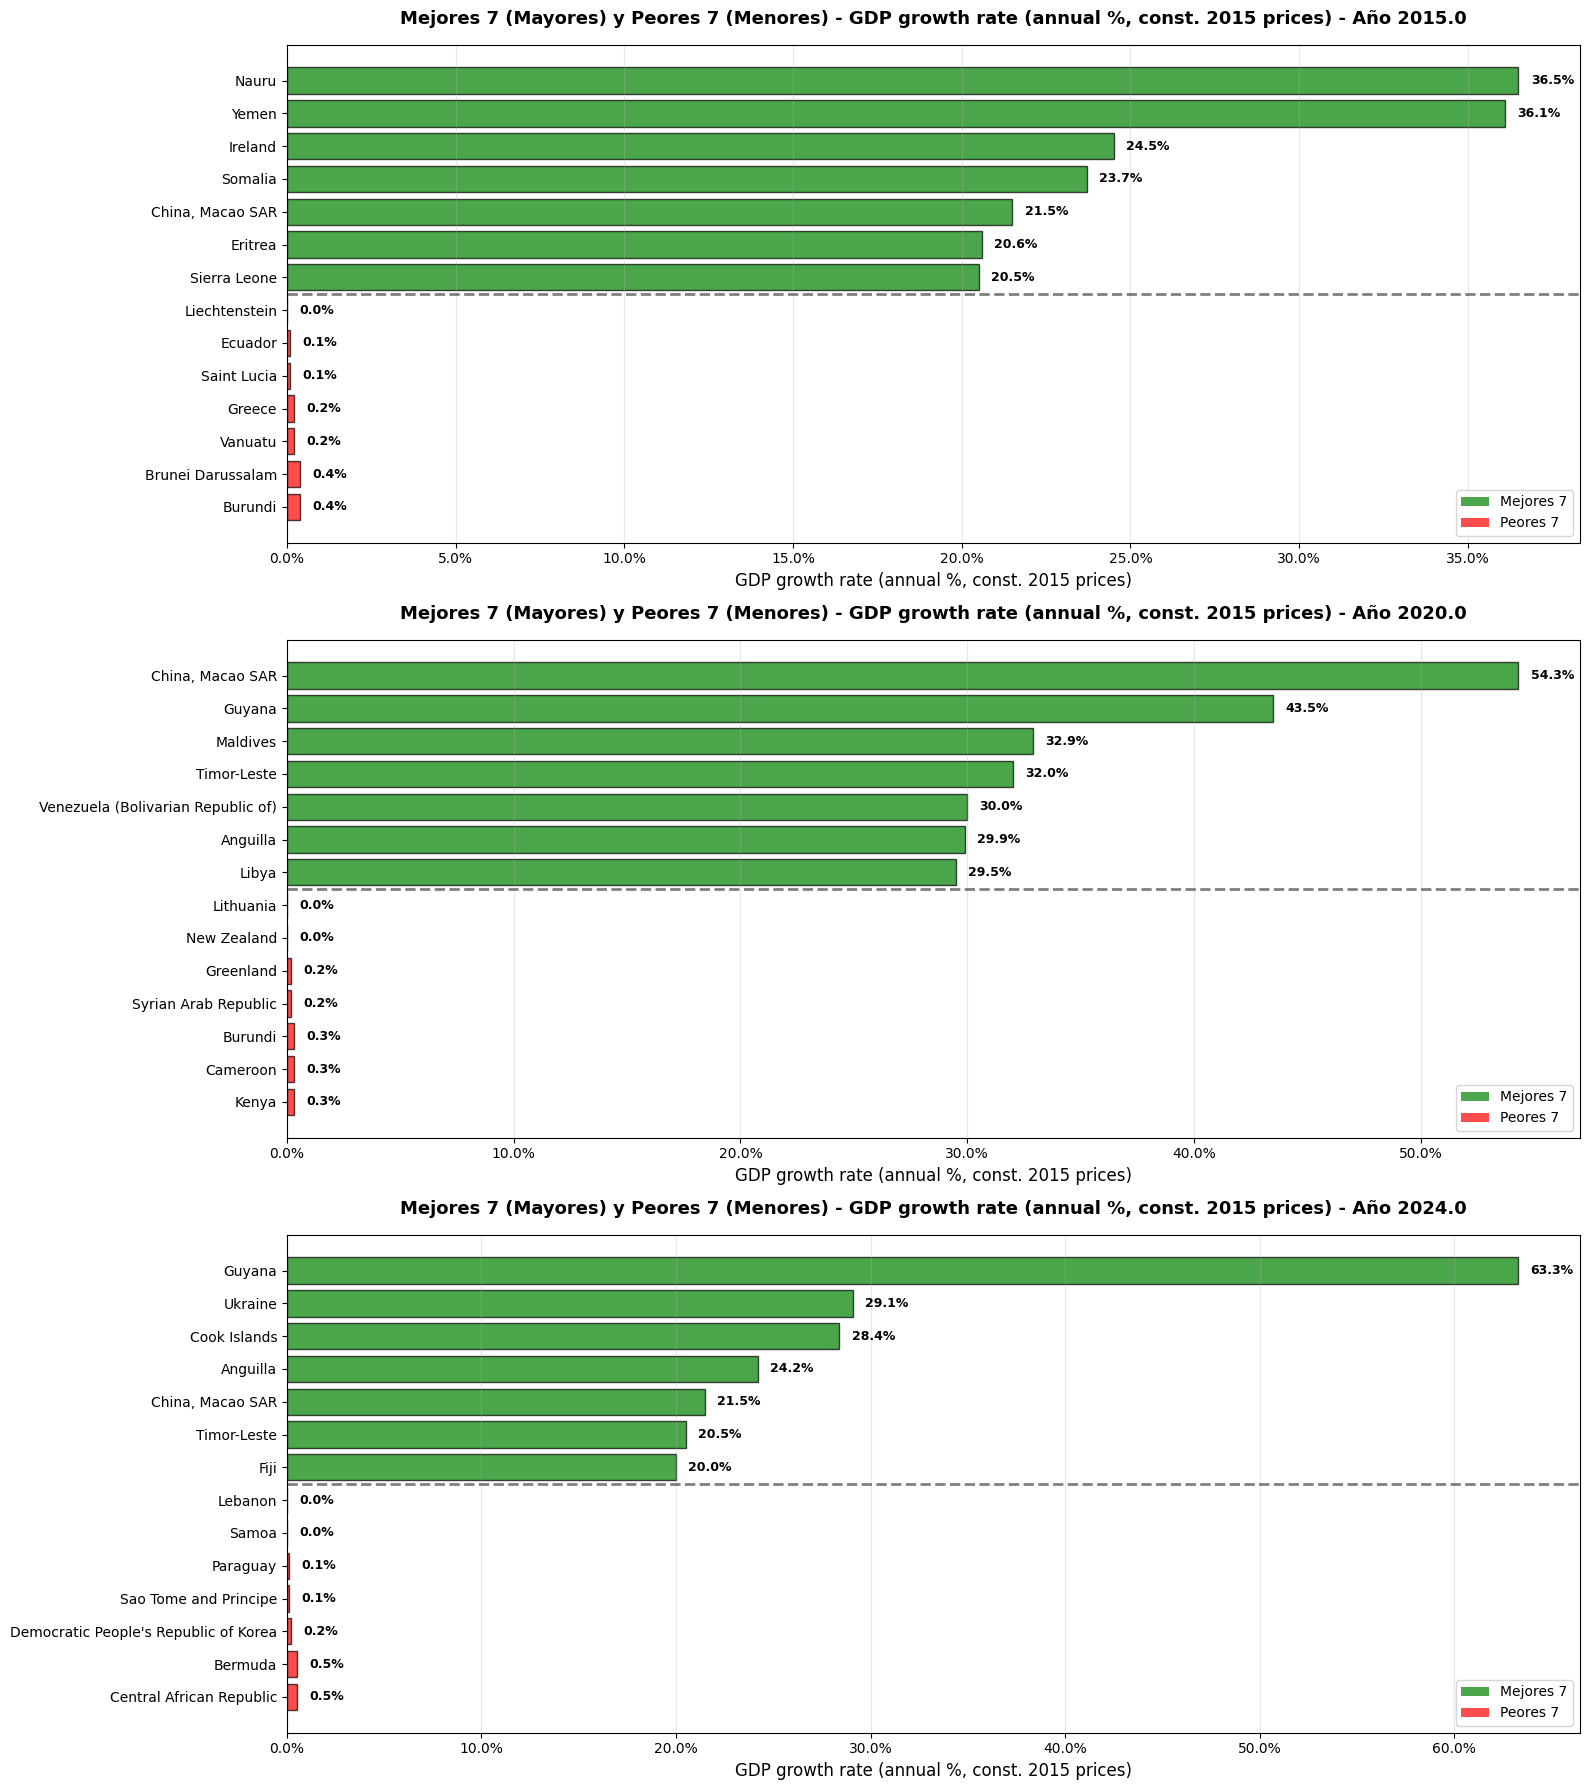


Procesando 3/7: Unemployment (% of labour force)


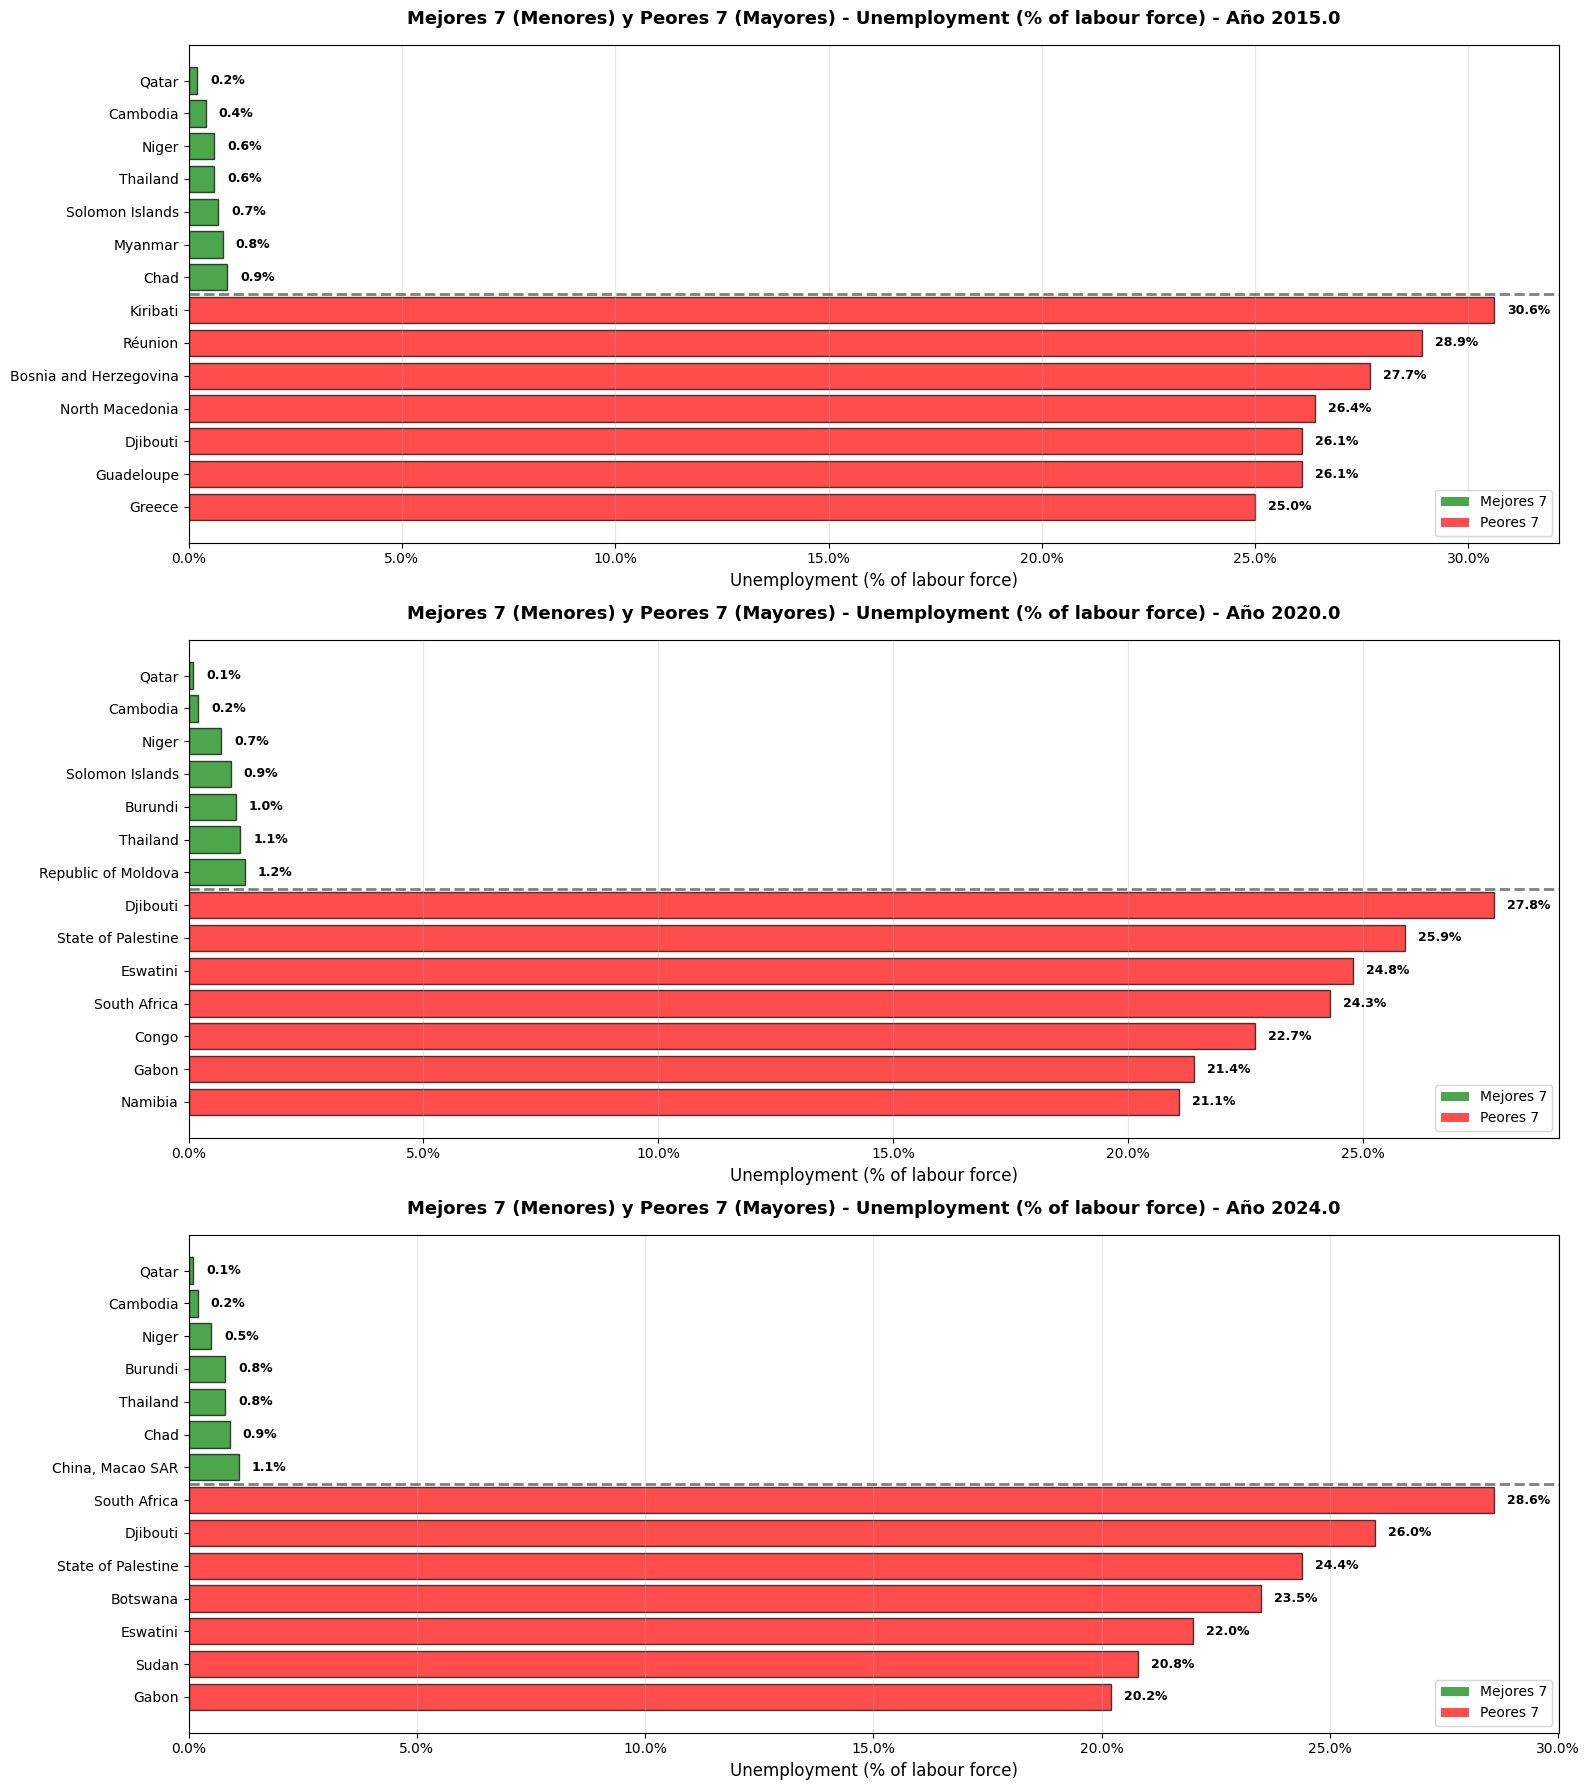


Procesando 4/7: Health: Physicians (per 1 000 pop.)


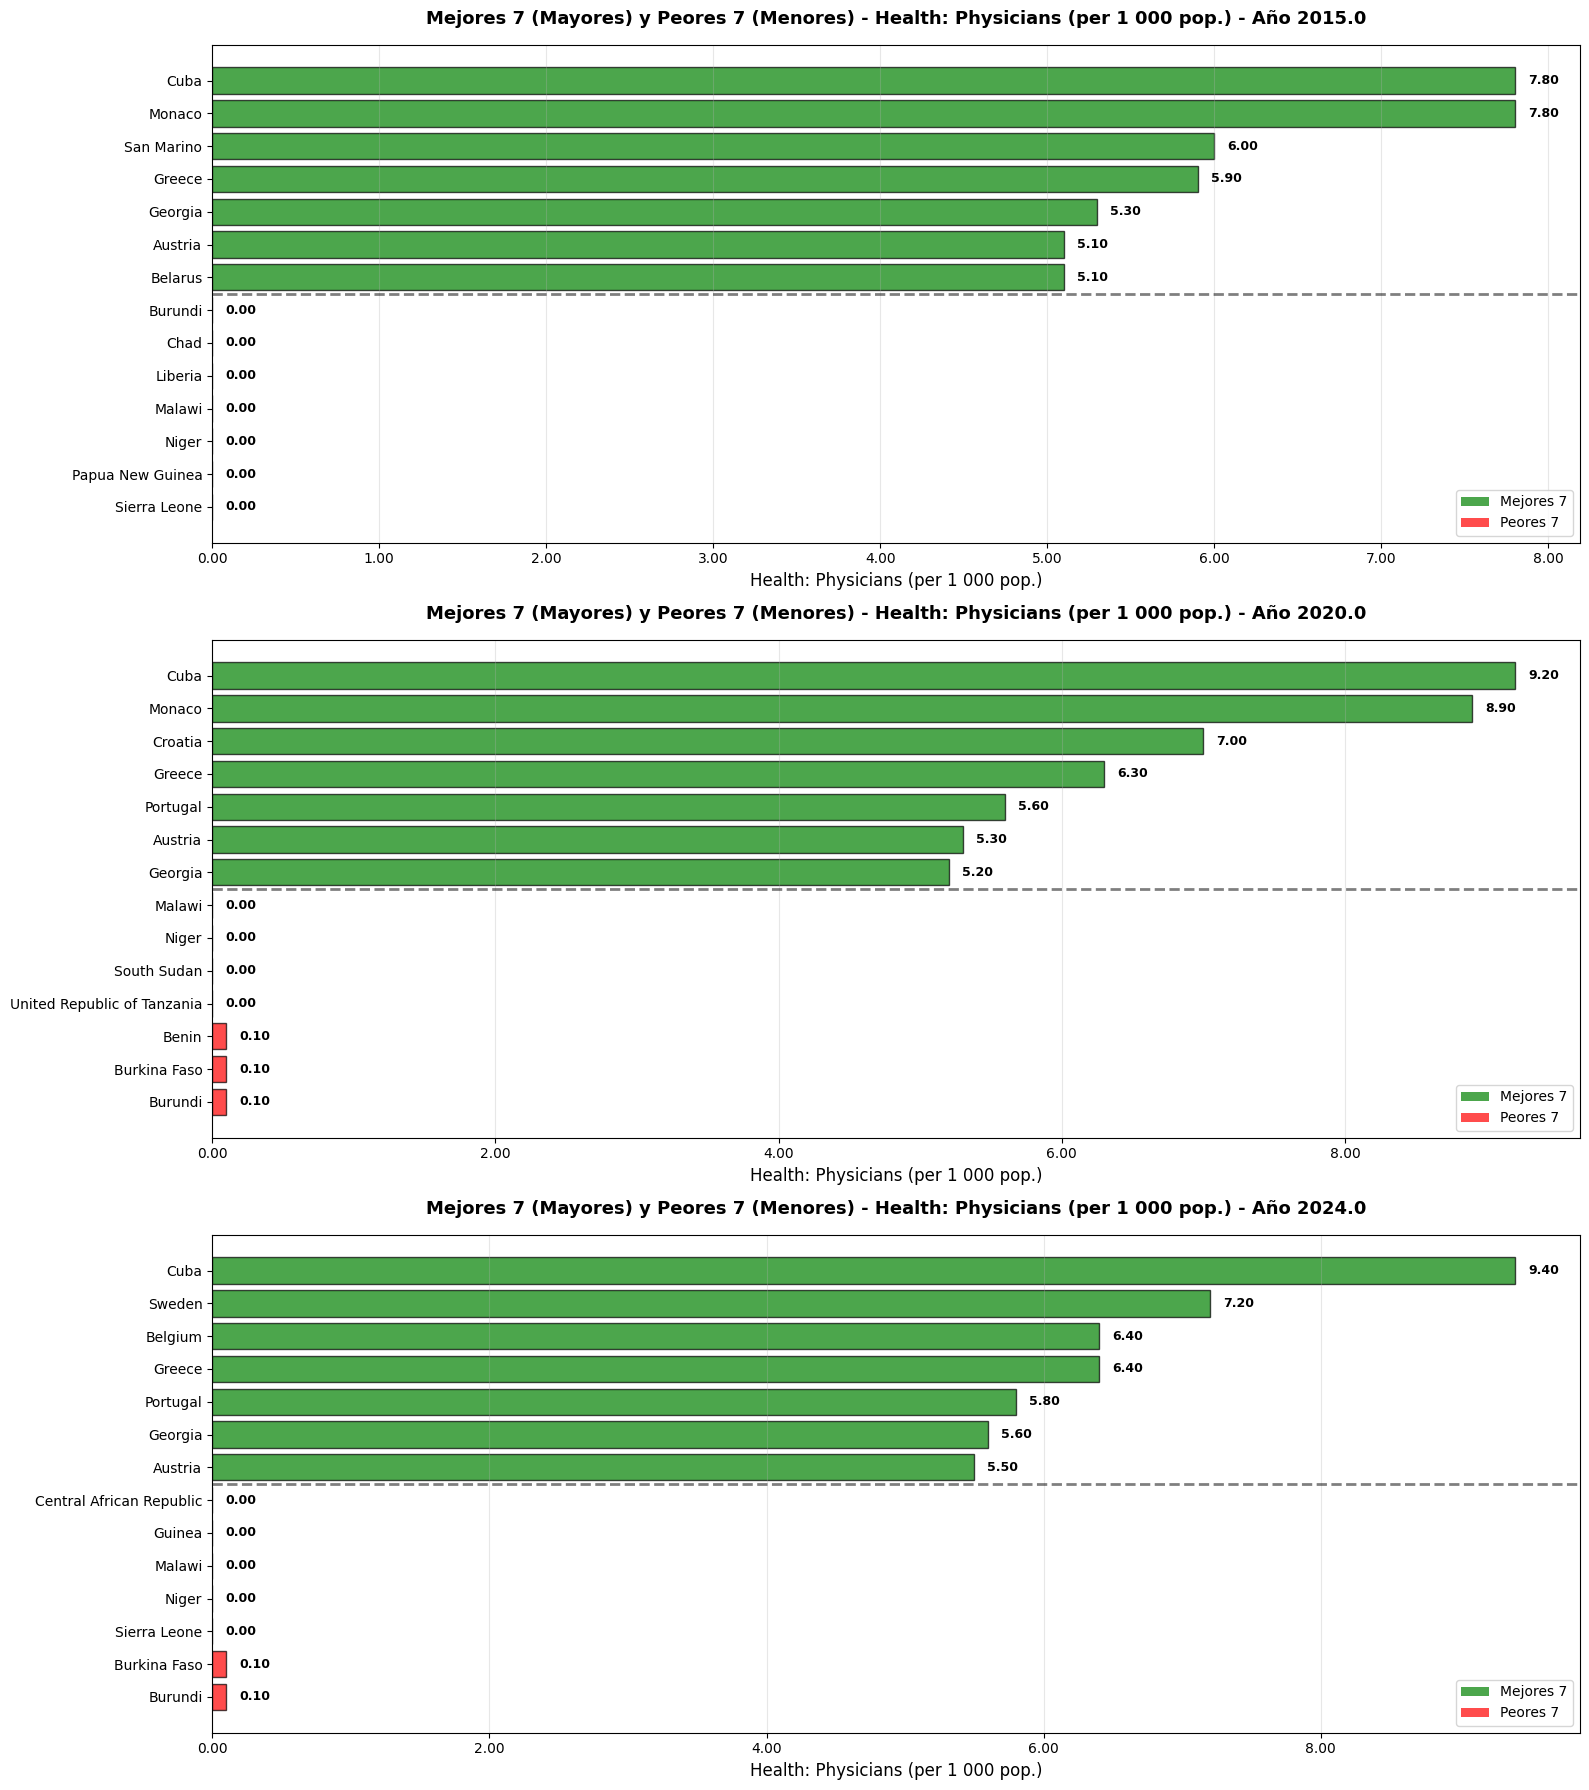


Procesando 5/7: Life expectancy at birth - average


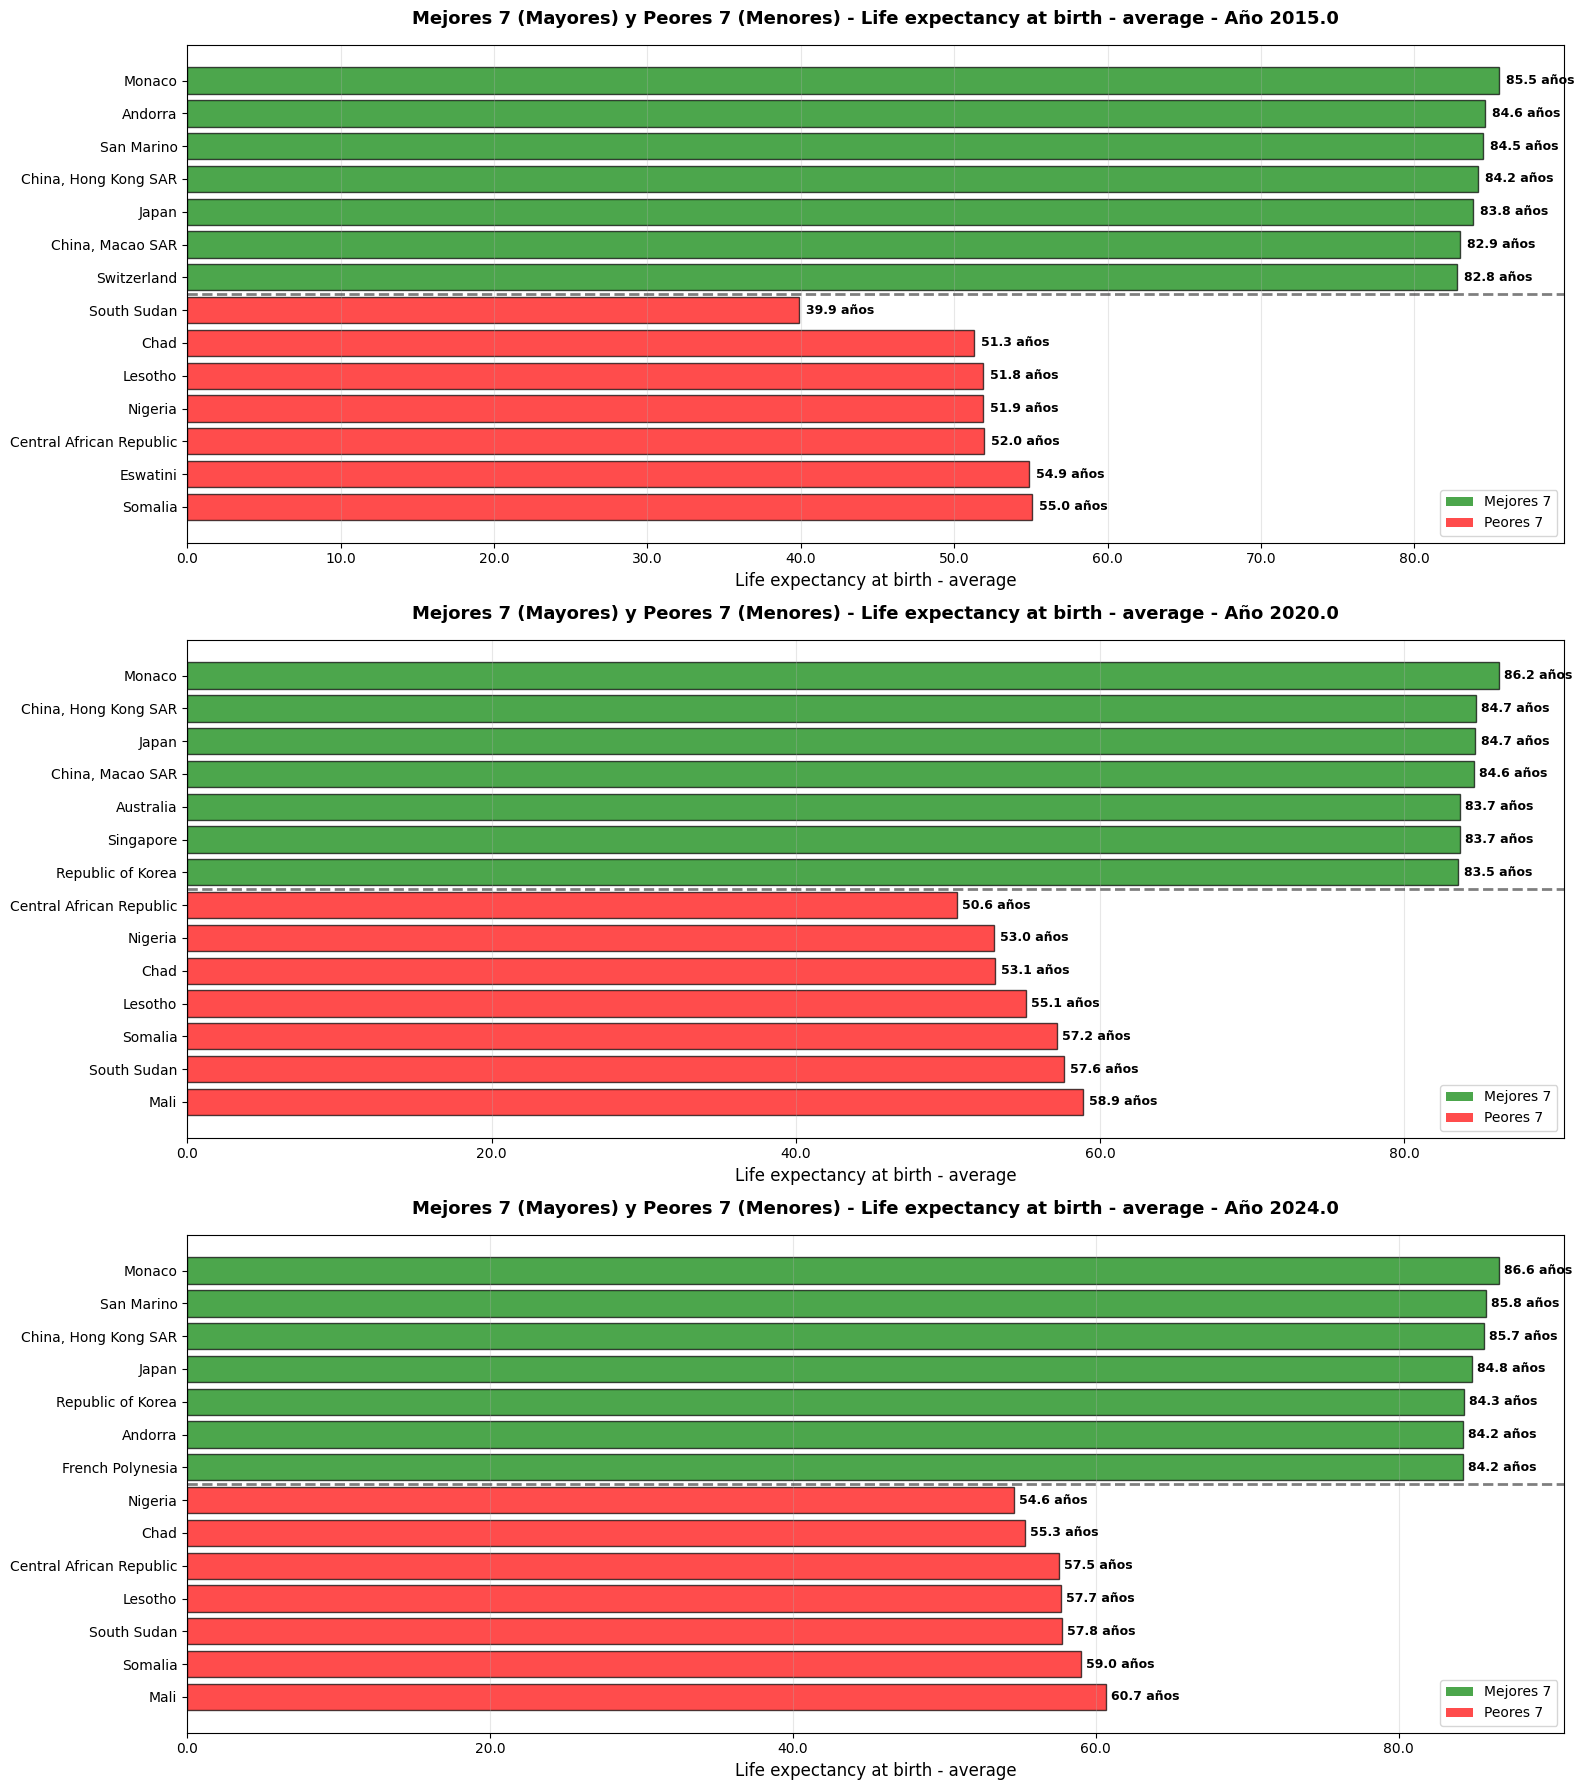


Procesando 6/7: Intentional homicide rate (per 100 000 pop.)


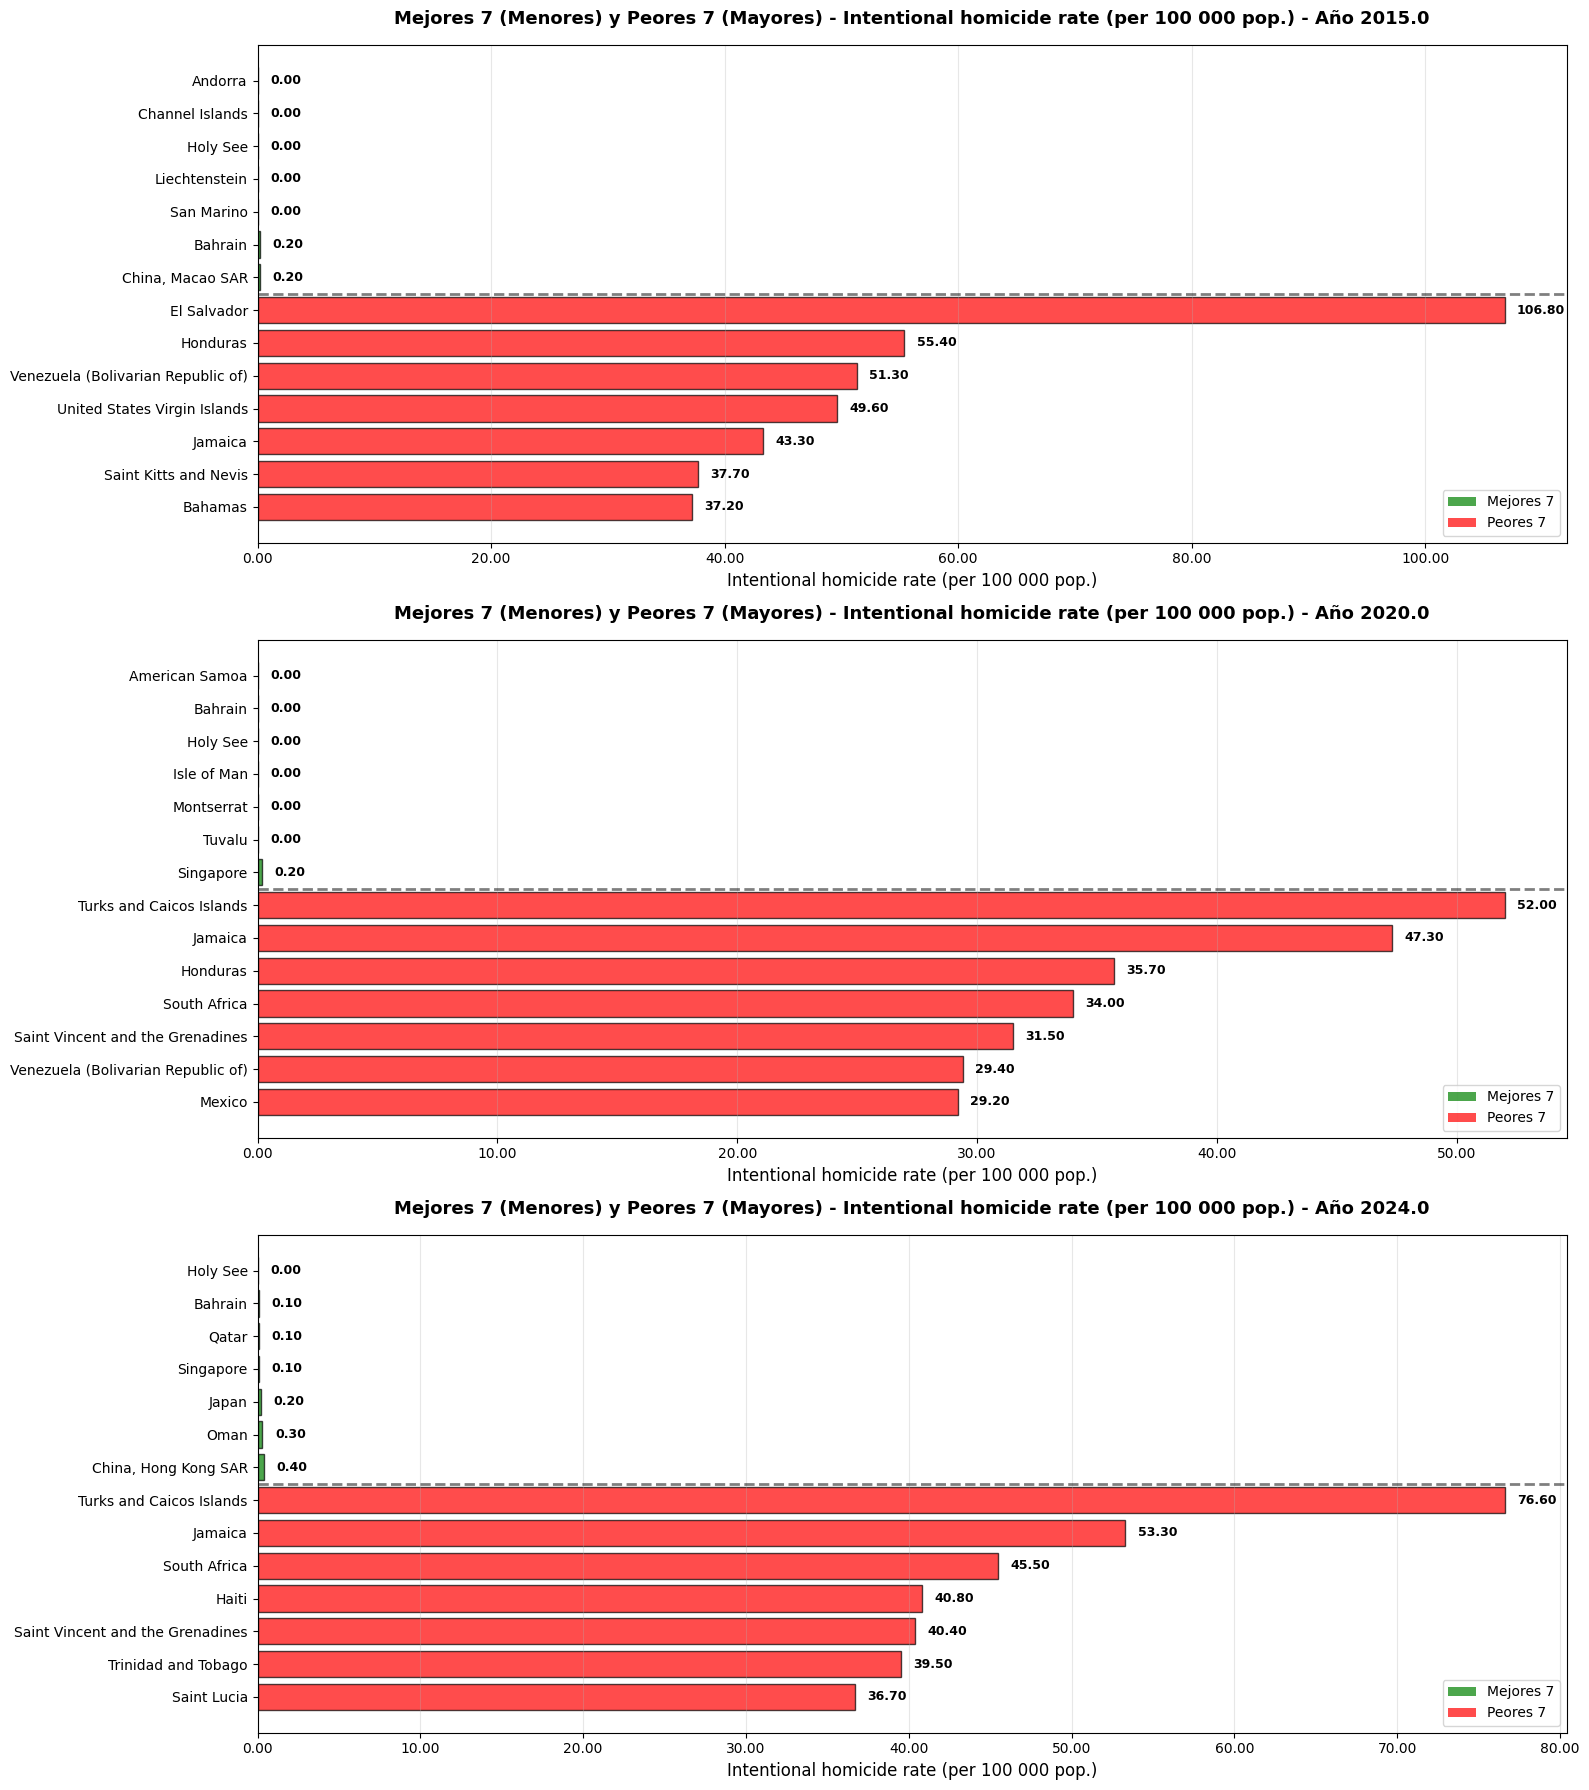


Procesando 7/7: Health: Current expenditure (% of GDP)


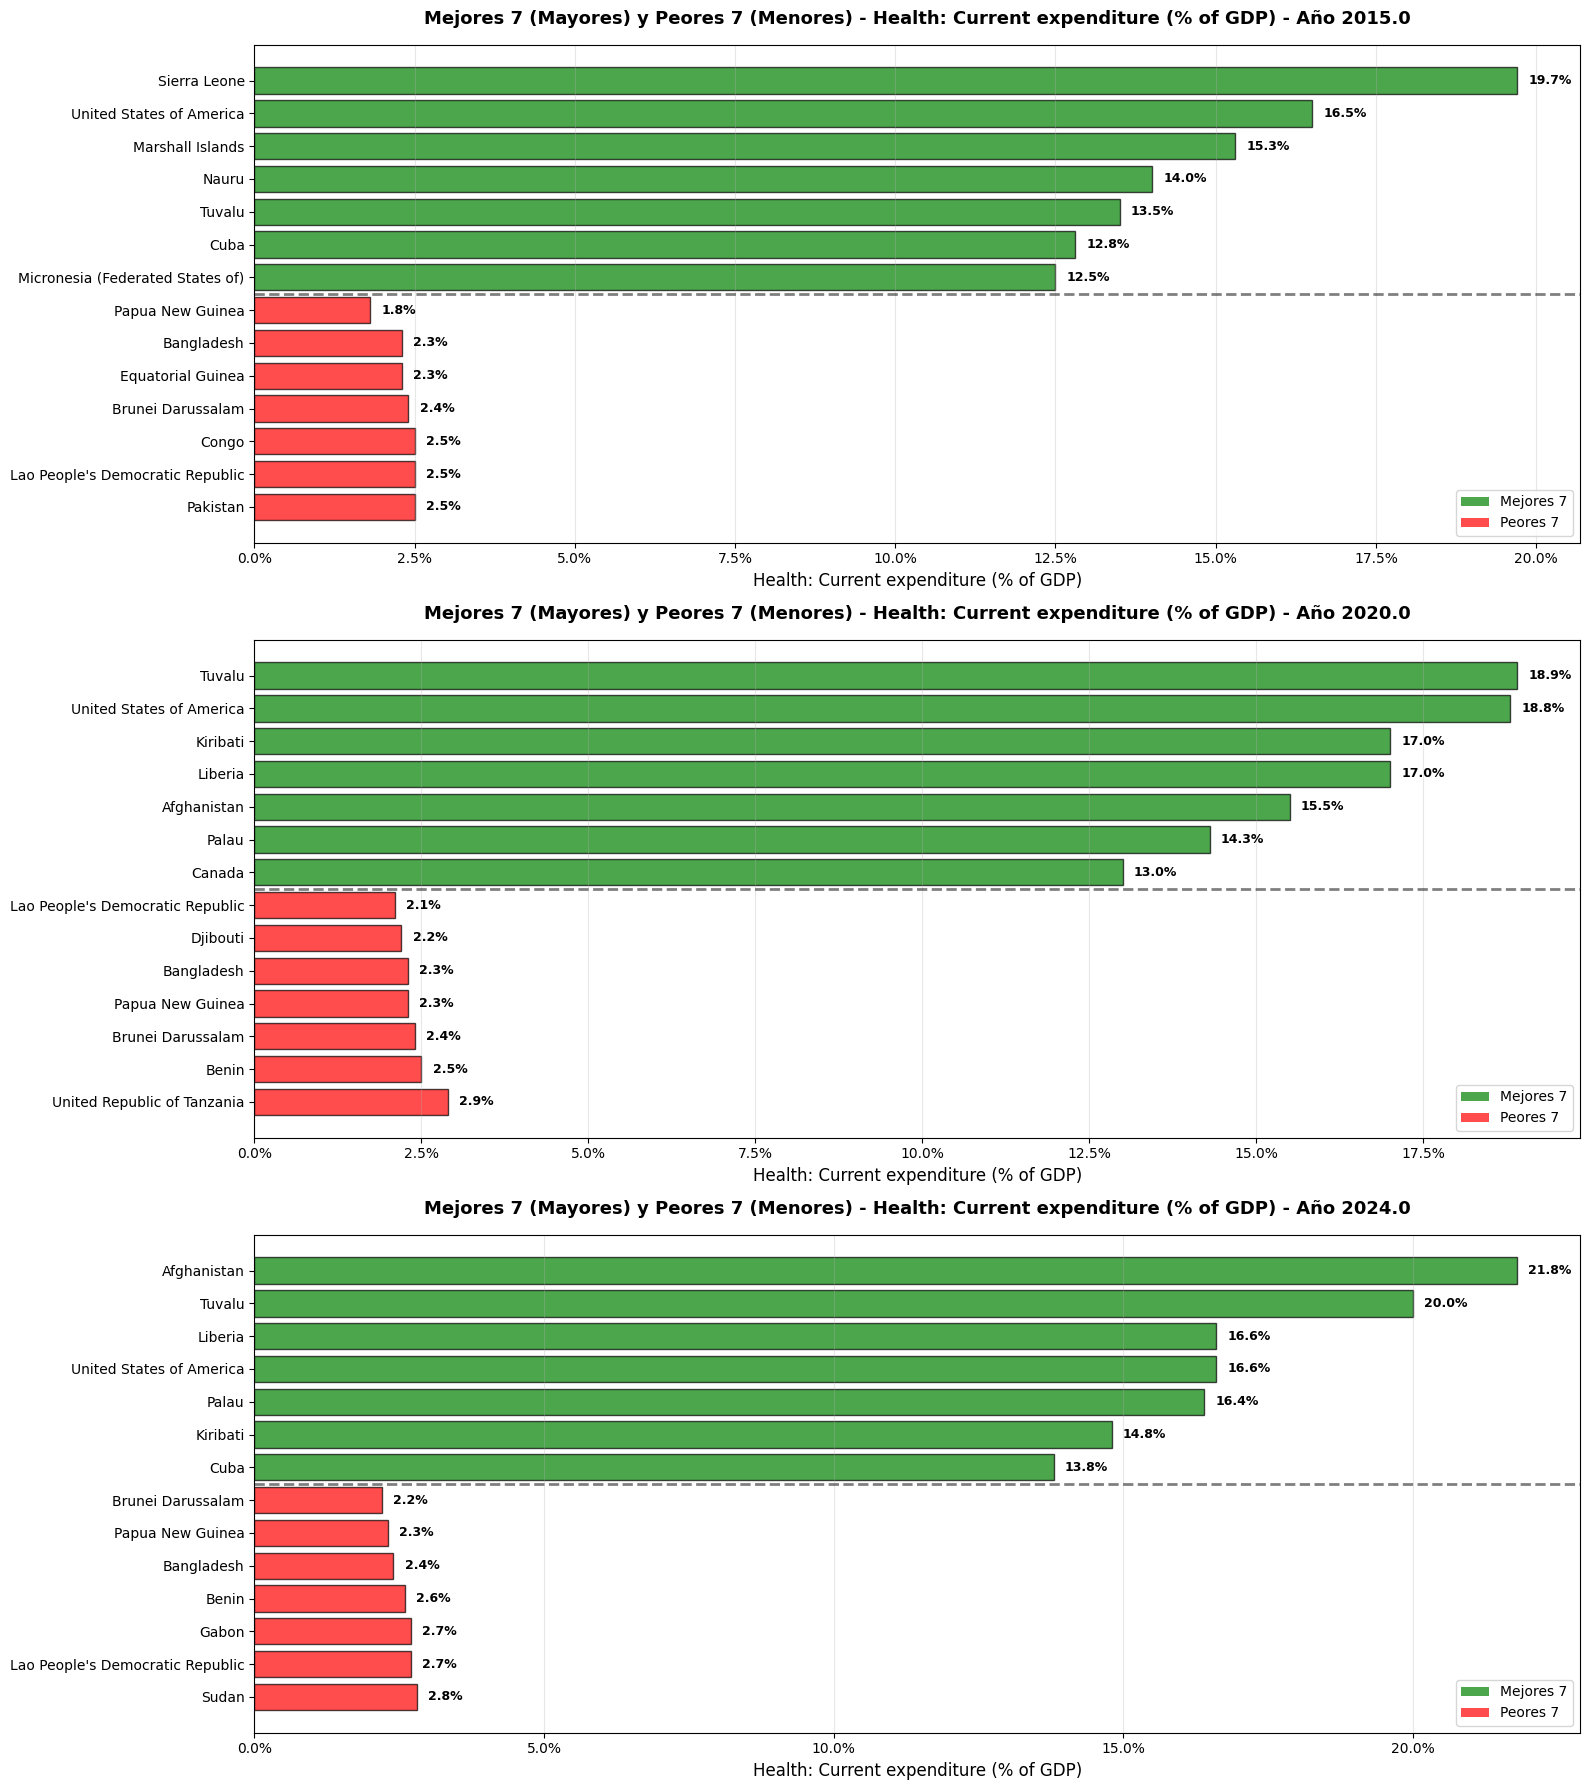

In [84]:
# VISUALIZACIÓN DE TODAS LAS KEY VARIABLES POR AÑO - TOP 7 Y WORST 7
print("📊 CREANDO VISUALIZACIONES DE TODAS LAS VARIABLES CLAVE POR AÑO")
print("="*70)

# Obtener años disponibles
available_years = sorted(df['Year'].unique())
print(f"Años disponibles: {available_years}")

viz_variables = [var for var in key_variables]
print(f"Variables a visualizar: {len(viz_variables)}")

# Configurar colores para cada año
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

# Crear visualización para cada variable
for var_idx, variable in enumerate(viz_variables):
    print(f"\nProcesando {var_idx+1}/{len(viz_variables)}: {variable}")
    
    # Crear figura con subplots para cada año
    fig, axes = plt.subplots(len(available_years), 1, figsize=(16, 6 * len(available_years)))
    if len(available_years) == 1:
        axes = [axes]
    
    # Determinar el tipo de ordenamiento basado en la variable
    ascending_vars = [
        "Unemployment (% of labour force)",
        "Intentional homicide rate (per 100 000 pop.)"
    ]
    ascending = variable in ascending_vars
    
    for idx, year in enumerate(available_years):
        year_data = df[df['Year'] == year].copy()
        var_data = year_data.dropna(subset=[variable])
        
        if len(var_data) > 0:
            # Ordenar según el tipo de variable (menor es mejor vs mayor es mejor)
            var_sorted = var_data.sort_values(variable, ascending=False).reset_index(drop=True)
            
            # Obtener top 7 y worst 7
            if ascending:  # Para variables donde menor es mejor
                best_7 = var_data.nsmallest(7, variable)  # Menores valores (mejores)
                worst_7 = var_data.nlargest(7, variable)  # Mayores valores (peores)
                title_prefix = "Mejores 7 (Menores) y Peores 7 (Mayores)"
            else:  # Para variables donde mayor es mejor
                best_7 = var_data.nlargest(7, variable)  # Mayores valores (mejores)
                worst_7 = var_data.nsmallest(7, variable)  # Menores valores (peores)
                title_prefix = "Mejores 7 (Mayores) y Peores 7 (Menores)"
            
            # Combinar best y worst con separador visual
            combined_countries = pd.concat([best_7, worst_7]).reset_index(drop=True)
            combined_values = combined_countries[variable].tolist()
            combined_labels = combined_countries['Country'].tolist()
            
            # Crear colores: verde para mejores, rojo para peores
            bar_colors = ['green'] * 7 + ['red'] * 7
            
            # Crear gráfico de barras horizontal
            bars = axes[idx].barh(range(len(combined_countries)), 
                                 combined_values, 
                                 color=bar_colors, alpha=0.7, edgecolor='black')
            
            # Configurar etiquetas del eje Y (países)
            axes[idx].set_yticks(range(len(combined_countries)))
            axes[idx].set_yticklabels(combined_labels, fontsize=10)
            
            # Invertir el eje Y para que los mejores estén arriba
            axes[idx].invert_yaxis()
            
            # Agregar valores en las barras y rankings
            for i, (bar, value, country) in enumerate(zip(bars, combined_values, combined_labels)):
                width = bar.get_width()
                
                # Formato específico según la variable
                if "%" in variable:
                    value_text = f'{value:.1f}%'
                elif "per 1 000" in variable or "per 100 000" in variable:
                    value_text = f'{value:.2f}'
                elif "Gigajoules" in variable:
                    value_text = f'{value:.1f} GJ'
                elif "years" in variable or "average" in variable:
                    value_text = f'{value:.1f} años'
                else:
                    value_text = f'{value:.2f}'
                
                # Posición del texto del valor
                text_x = width + (max(combined_values) - min(combined_values)) * 0.01
                axes[idx].text(text_x, bar.get_y() + bar.get_height()/2,
                              value_text, ha='left', va='center', fontsize=9, fontweight='bold')
            
            # Agregar línea separadora visual entre mejores y peores
            axes[idx].axhline(y=6.5, color='black', linestyle='--', alpha=0.5, linewidth=2)
            
            # Personalizar el gráfico
            axes[idx].set_xlabel(variable, fontsize=12)
            axes[idx].set_title(f'{title_prefix} - {variable} - Año {year}', 
                               fontsize=13, fontweight='bold', pad=15)
            axes[idx].grid(True, alpha=0.3, axis='x')
            
            # Agregar leyenda
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor='green', alpha=0.7, label='Mejores 7'),
                             Patch(facecolor='red', alpha=0.7, label='Peores 7')]
            axes[idx].legend(handles=legend_elements, loc='lower right', fontsize=10)
            
            # Formato del eje X específico para cada variable
            if "%" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
            elif "Gigajoules" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f} GJ'))
            elif "years" in variable or "average" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
            else:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
        
        else:
            # Si no hay datos para ese año
            axes[idx].text(0.5, 0.5, f'Sin datos disponibles para {year}', 
                          transform=axes[idx].transAxes, ha='center', va='center',
                          fontsize=14, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
            axes[idx].set_title(f'{variable} - Año {year} (Sin datos)', fontsize=14)
    
    plt.tight_layout()
    
    # Guardar cada visualización con nombre específico
    safe_filename = variable.replace('/', '_').replace('(', '').replace(')', '').replace(' ', '_').replace('-', '_')
    plt.savefig(f"../src/visualization/{safe_filename}_top7_worst7_by_year.png", 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()



## GDP analysis

In [83]:
df['gdp_class'] = pd.qcut(df["GDP per capita (current US$)"],
                                q=4,
                                labels=False,
                                duplicates='drop')

📊 ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR CLASE GDP
Distribución de clases GDP:
  Clase 0: 158 países
  Clase 1: 157 países
  Clase 2: 157 países
  Clase 3: 158 países

Creando 6 scatter plots para mostrar interacciones...
Procesando scatter plot 1: Life expectancy at birth - average vs Health: Physicians (per 1 000 pop.)
Procesando scatter plot 2: GDP per capita (current US$) vs Life expectancy at birth - average
Procesando scatter plot 3: Health: Current expenditure (% of GDP) vs Health: Physicians (per 1 000 pop.)
Procesando scatter plot 4: GDP per capita (current US$) vs Health: Current expenditure (% of GDP)
Procesando scatter plot 5: Life expectancy at birth - average vs Intentional homicide rate (per 100 000 pop.)
Procesando scatter plot 6: GDP per capita (current US$) vs Unemployment (% of labour force)


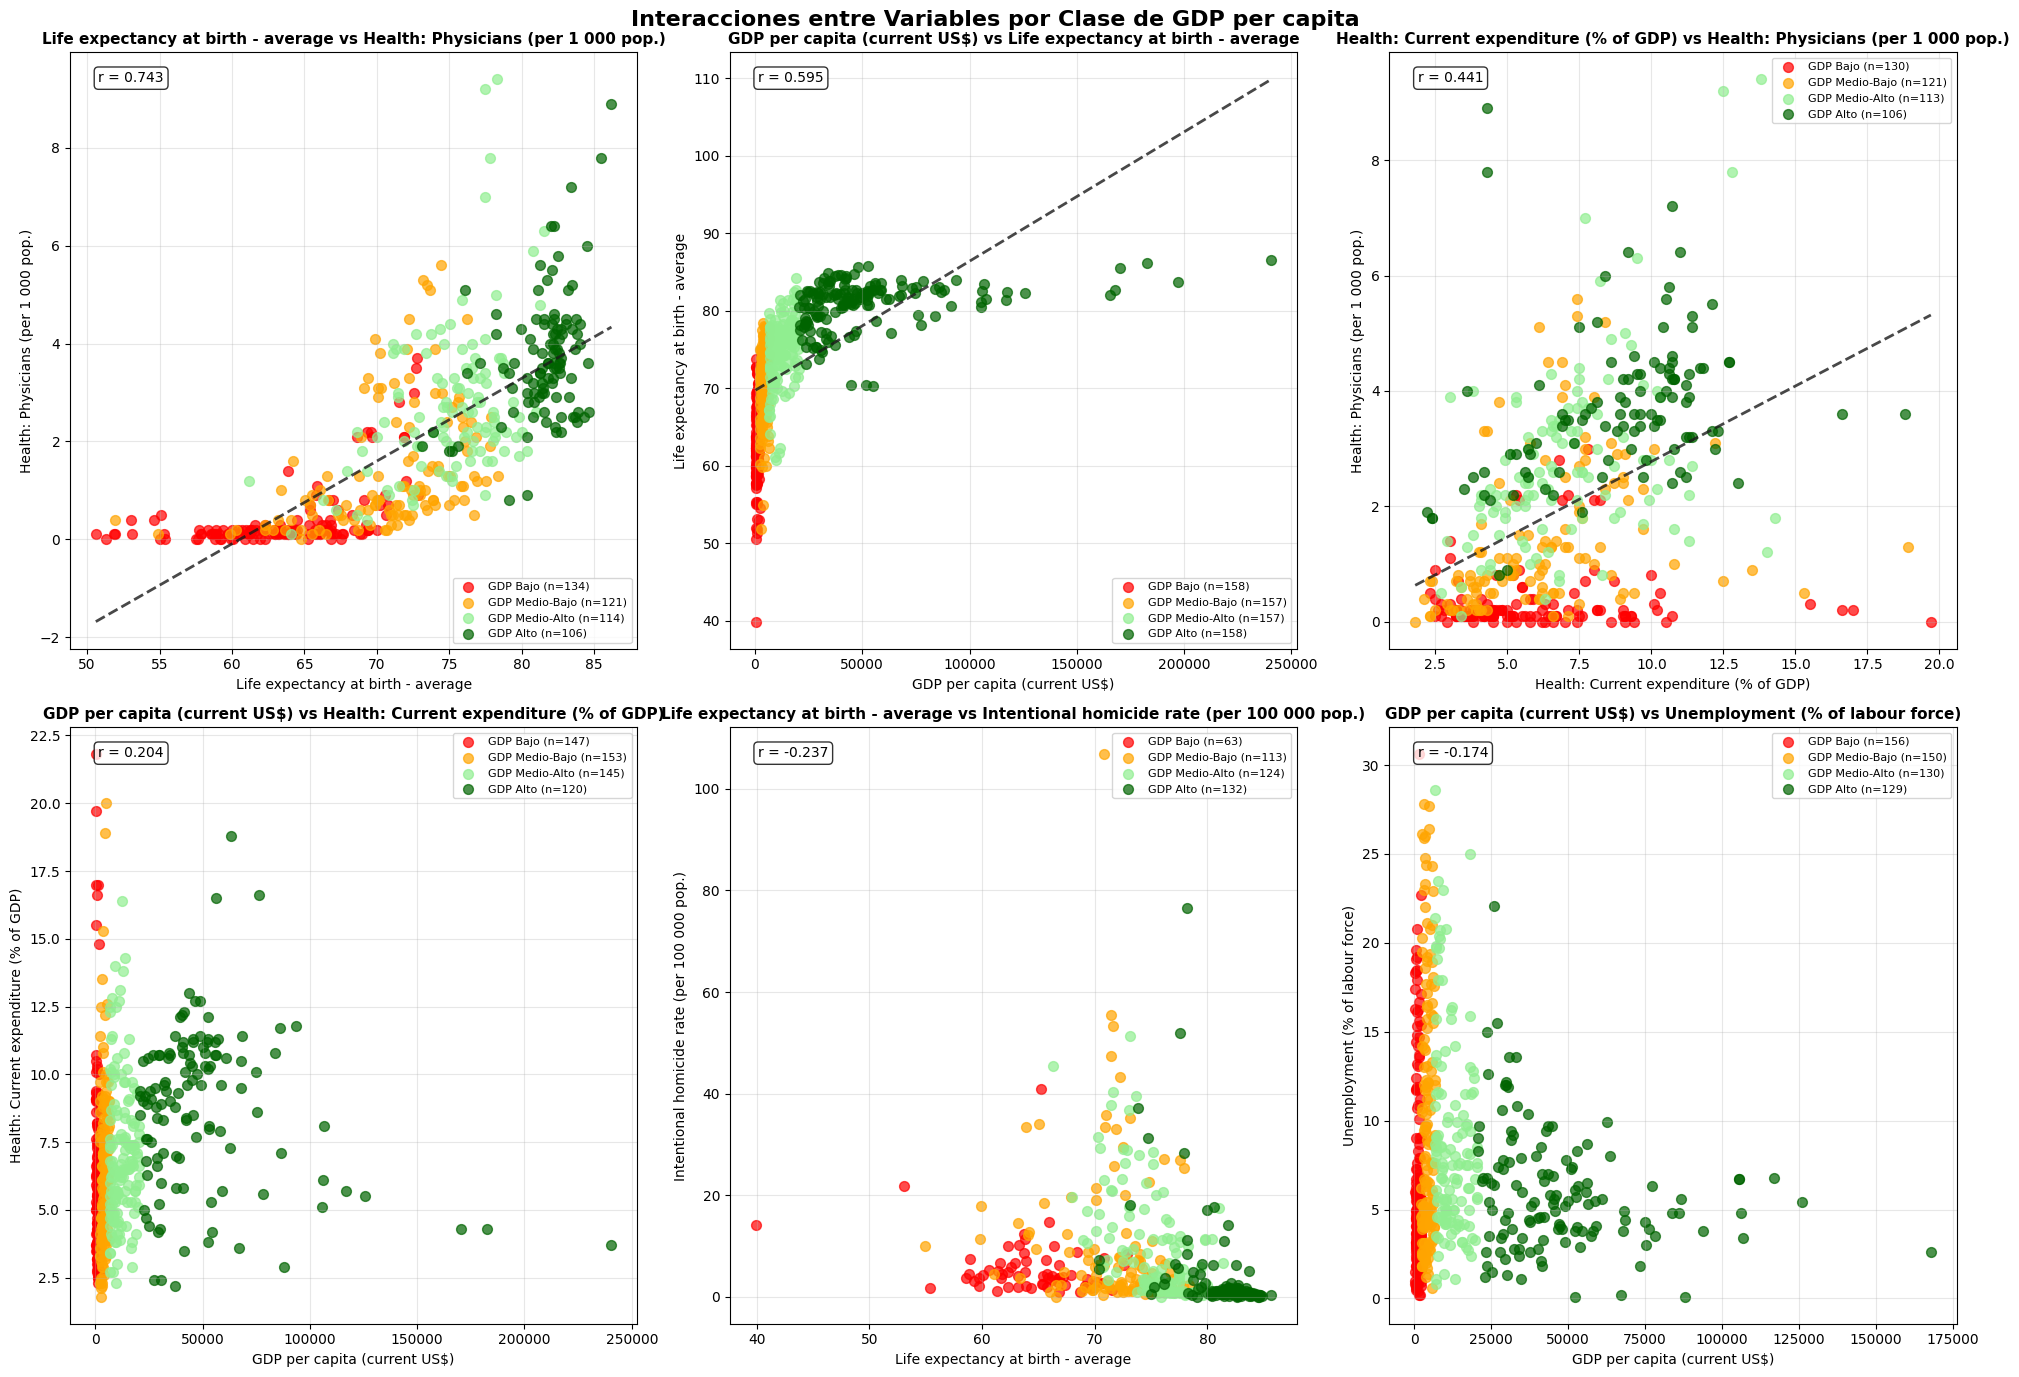


✅ Scatter plots guardados en: gdp_class_interactions_scatter.png


In [85]:
# SCATTER PLOTS PARA ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR GDP CLASS
print("📊 ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR CLASE GDP")
print("="*70)

# Verificar distribución de clases GDP
print("Distribución de clases GDP:")
gdp_class_counts = df['gdp_class'].value_counts().sort_index()  
for class_idx, count in gdp_class_counts.items():
    if pd.notna(class_idx):
        print(f"  Clase {int(class_idx)}: {count} países")

# Mapear clases numéricas a etiquetas descriptivas
class_labels = {0: 'GDP Bajo', 1: 'GDP Medio-Bajo', 2: 'GDP Medio-Alto', 3: 'GDP Alto'}
df['gdp_class_label'] = df['gdp_class'].map(class_labels)

# Variables más relevantes para scatter plots basadas en correlaciones con GDP
scatter_variables = [
    # Variables con alta correlación con GDP (de tu análisis anterior)
    ("Life expectancy at birth - average", "Health: Physicians (per 1 000 pop.)"),
    ("GDP per capita (current US$)", "Life expectancy at birth - average"),
    ("Health: Current expenditure (% of GDP)", "Health: Physicians (per 1 000 pop.)"),
    ("GDP per capita (current US$)", "Health: Current expenditure (% of GDP)"),
    ("Life expectancy at birth - average", "Intentional homicide rate (per 100 000 pop.)"),
    ("GDP per capita (current US$)", "Unemployment (% of labour force)")
]

print(f"\nCreando {len(scatter_variables)} scatter plots para mostrar interacciones...")

# Configurar la figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

# Colores para las clases GDP
colors = ['red', 'orange', 'lightgreen', 'darkgreen']
class_colors = {i: colors[i] for i in range(4)}

for idx, (var_x, var_y) in enumerate(scatter_variables):
    print(f"Procesando scatter plot {idx+1}: {var_x} vs {var_y}")
    
    # Filtrar datos válidos para ambas variables
    valid_data = df[[var_x, var_y, 'gdp_class', 'gdp_class_label', 'Country']].dropna()
    
    if len(valid_data) > 10:
        # Crear scatter plot por clase GDP
        for gdp_class in sorted(valid_data['gdp_class'].unique()):
            if pd.notna(gdp_class):
                class_data = valid_data[valid_data['gdp_class'] == gdp_class]
                axes[idx].scatter(class_data[var_x], class_data[var_y], 
                                c=colors[int(gdp_class)], alpha=0.7, s=50,
                                label=f'{class_labels[gdp_class]} (n={len(class_data)})')
        
        # Personalizar el gráfico
        axes[idx].set_xlabel(var_x, fontsize=10)
        axes[idx].set_ylabel(var_y, fontsize=10)
        axes[idx].set_title(f'{var_x} vs {var_y}', fontsize=11, fontweight='bold')
        axes[idx].legend(fontsize=8, loc='best')
        axes[idx].grid(True, alpha=0.3)
        
        # Calcular y mostrar correlación general
        correlation = valid_data[var_x].corr(valid_data[var_y])
        axes[idx].text(0.05, 0.95, f'r = {correlation:.3f}', 
                      transform=axes[idx].transAxes, fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Línea de tendencia general
        if abs(correlation) > 0.3:  # Solo si hay correlación moderada
            z = np.polyfit(valid_data[var_x], valid_data[var_y], 1)
            p = np.poly1d(z)
            x_trend = np.linspace(valid_data[var_x].min(), valid_data[var_x].max(), 100)
            axes[idx].plot(x_trend, p(x_trend), "k--", alpha=0.8, linewidth=2)
    
    else:
        axes[idx].text(0.5, 0.5, 'Datos insuficientes', 
                      transform=axes[idx].transAxes, ha='center', va='center')
        axes[idx].set_title(f'{var_x} vs {var_y} - Sin datos')

plt.suptitle('Interacciones entre Variables por Clase de GDP per capita', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("../src/visualization/gdp_class_interactions_scatter.png", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n✅ Scatter plots guardados en: gdp_class_interactions_scatter.png")

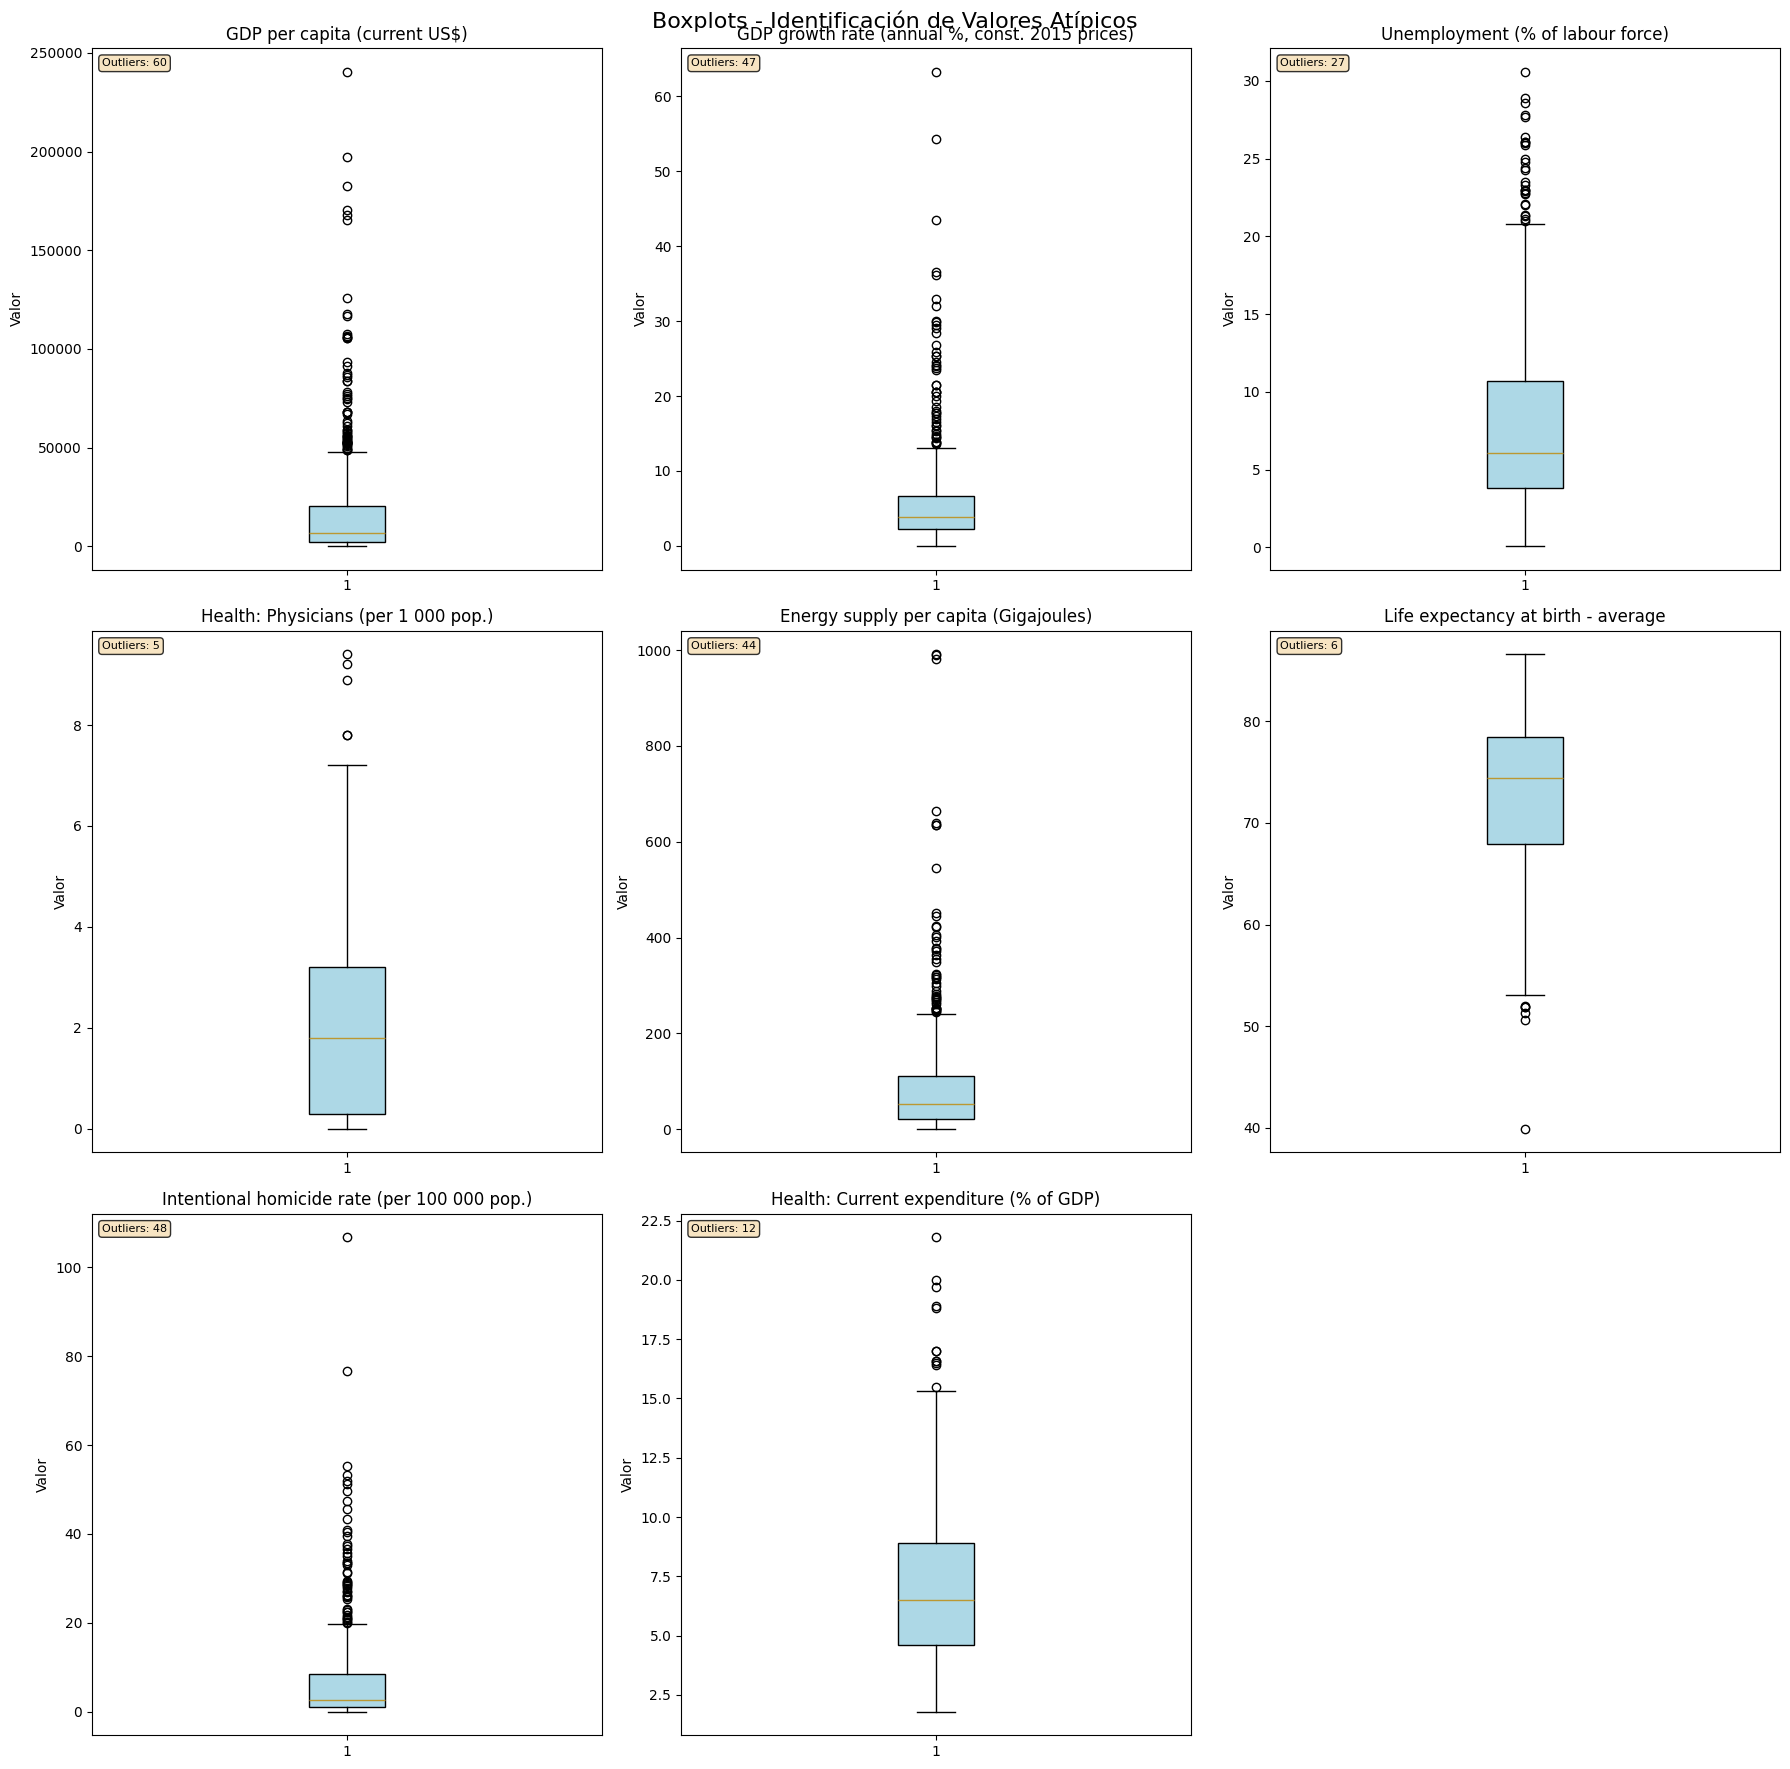

In [62]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Boxplots - Identificación de Valores Atípicos', fontsize=16)

for i, var in enumerate(key_variables):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df[var].dropna()
    
    if len(data) > 0:
        box_plot = axes[row, col].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[row, col].set_title(f'{var}')
        axes[row, col].set_ylabel('Valor')
        
        # Calcular y mostrar estadísticas de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Añadir texto con información de outliers
        axes[row, col].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Análisis de Correlaciones

In [47]:
# Matriz de correlación para todas las variables numéricas
# Seleccionar solo variables numéricas con menos valores faltantes
numeric_data = df.select_dtypes(include=[np.number])

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (numeric_data.isnull().sum() / len(numeric_data)) * 100

# Filtrar columnas con menos del 50% de valores faltantes
good_columns_series = missing_percentage[missing_percentage < 50]

# Sort by missing percentage (ascending - best quality first)
good_columns_sorted = good_columns_series.sort_values()
good_columns = good_columns_sorted.index.tolist()

# Show summary by quality tiers
print(f"\n📊 RESUMEN POR CALIDAD:")
excellent = good_columns_sorted[good_columns_sorted <= 5]
good = good_columns_sorted[(good_columns_sorted > 5) & (good_columns_sorted <= 15)]
fair = good_columns_sorted[(good_columns_sorted > 15) & (good_columns_sorted <= 30)]
poor = good_columns_sorted[good_columns_sorted > 30]

print(f"• Excelente calidad (≤5% faltantes):  {len(excellent):>3} variables")
print(f"• Buena calidad (5-15% faltantes):    {len(good):>3} variables") 
print(f"• Calidad regular (15-30% faltantes): {len(fair):>3} variables")
print(f"• Calidad baja (30-50% faltantes):    {len(poor):>3} variables")

print("\nVariables con calidad EXCELENTE (≤5% faltantes):")
for var in excellent.index:
    print(f"- {var} ({excellent[var]:.2f}% faltantes)")


📊 RESUMEN POR CALIDAD:
• Excelente calidad (≤5% faltantes):   24 variables
• Buena calidad (5-15% faltantes):     12 variables
• Calidad regular (15-30% faltantes):  22 variables
• Calidad baja (30-50% faltantes):      9 variables

Variables con calidad EXCELENTE (≤5% faltantes):
- Year (0.00% faltantes)
- Capital_city_pop (0.43% faltantes)
- Exchange rate (per US$) (0.43% faltantes)
- Threatened species (number) (0.43% faltantes)
- Under five mortality rate (per 1000 live births) (0.86% faltantes)
- Life expectancy at birth - Female (years) (0.86% faltantes)
- Life expectancy at birth - Male (years) (0.86% faltantes)
- Life expectancy at birth - Female/Life expectancy at birth - Male Ratio (0.86% faltantes)
- Population age distribution - 0-14 years (%) (0.86% faltantes)
- Population age distribution - 60+ years (%) (0.86% faltantes)
- Population age distribution - 0-14 years/Population age distribution - 60+ years Ratio (0.86% faltantes)
- Forested area (% of land area) (0.86% falta

In [49]:
# ANÁLISIS DE CORRELACIÓN ESPECÍFICO CONTRA KEY VARIABLES
print("🎯 ANÁLISIS DE CORRELACIÓN CONTRA VARIABLES CLAVE")
print("="*70)

# Definir umbral de correlación para considerar variables relevantes
CORRELATION_THRESHOLD = 0.3  # Solo variables con |r| >= 0.3

print(f"Umbral de correlación: |r| >= {CORRELATION_THRESHOLD}")
print(f"Variables clave objetivo: {len(key_variables)}")

# Análisis de correlación para cada variable clave
relevant_predictors = {}  # Diccionario para almacenar predictores relevantes por variable clave

for key_var in key_variables:
    print(f"\n{'='*50}")
    print(f"🔍 ANÁLISIS PARA: {key_var}")
    print(f"{'='*50}")
    
    # Obtener correlaciones de esta variable clave con todas las otras variables numéricas
    correlations = {}
    for col in good_columns:
        if col != key_var:  # Excluir correlación consigo misma
            corr = df[key_var].corr(df[col])
            if not pd.isna(corr) and abs(corr) >= CORRELATION_THRESHOLD:
                correlations[col] = corr
    
    if correlations:
        # Ordenar por correlación absoluta (descendente)
        sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        relevant_predictors[key_var] = sorted_correlations
        
        print(f"Variables relevantes encontradas: {len(sorted_correlations)}")
        print(f"Correlaciones |r| >= {CORRELATION_THRESHOLD}:")
        print("-" * 60)
        
        # Separar correlaciones positivas y negativas
        positive_corr = [(var, corr) for var, corr in sorted_correlations if corr > 0]
        negative_corr = [(var, corr) for var, corr in sorted_correlations if corr < 0]
        
        if positive_corr:
            print("📈 CORRELACIONES POSITIVAS:")
            for var, corr in positive_corr[:10]:  # Top 10
                strength = "🟢 Fuerte" if abs(corr) >= 0.7 else "🟡 Moderada" if abs(corr) >= 0.5 else "🔵 Débil"
                print(f"   • {var:<45} r = {corr:+.3f} {strength}")
        
        if negative_corr:
            print("\n📉 CORRELACIONES NEGATIVAS:")
            for var, corr in negative_corr[:10]:  # Top 10
                strength = "🟢 Fuerte" if abs(corr) >= 0.7 else "🟡 Moderada" if abs(corr) >= 0.5 else "🔵 Débil"
                print(f"   • {var:<45} r = {corr:+.3f} {strength}")
        
        # Estadísticas resumidas
        strong_corr = [corr for _, corr in sorted_correlations if abs(corr) >= 0.7]
        moderate_corr = [corr for _, corr in sorted_correlations if 0.5 <= abs(corr) < 0.7]
        weak_corr = [corr for _, corr in sorted_correlations if 0.3 <= abs(corr) < 0.5]
        
        print(f"\n📊 RESUMEN DE FUERZA:")
        print(f"   • Correlaciones fuertes (|r| >= 0.7):     {len(strong_corr):>2}")
        print(f"   • Correlaciones moderadas (0.5-0.7):     {len(moderate_corr):>2}") 
        print(f"   • Correlaciones débiles (0.3-0.5):       {len(weak_corr):>2}")
        print(f"   • TOTAL RELEVANTES:                      {len(sorted_correlations):>2}")
        
    else:
        print(f"❌ No se encontraron variables con correlación |r| >= {CORRELATION_THRESHOLD}")
        relevant_predictors[key_var] = []

print(f"\n{'='*70}")
print("📋 RESUMEN GENERAL DEL ANÁLISIS")
print(f"{'='*70}")

# Resumen general
total_relevant = sum(len(predictors) for predictors in relevant_predictors.values())
variables_with_predictors = sum(1 for predictors in relevant_predictors.values() if len(predictors) > 0)

print(f"Variables clave analizadas:           {len(key_variables)}")
print(f"Variables clave con predictores:      {variables_with_predictors}")
print(f"Total de relaciones relevantes:       {total_relevant}")
print(f"Promedio predictores por variable:    {total_relevant/len(key_variables):.1f}")

# Identificar variables que aparecen como predictores frecuentemente
predictor_frequency = {}
for key_var, predictors in relevant_predictors.items():
    for predictor_var, corr in predictors:
        if predictor_var in predictor_frequency:
            predictor_frequency[predictor_var] += 1
        else:
            predictor_frequency[predictor_var] = 1

if predictor_frequency:
    print(f"\n🏆 PREDICTORES MÁS FRECUENTES (aparecen en múltiples variables clave):")
    frequent_predictors = sorted(predictor_frequency.items(), key=lambda x: x[1], reverse=True)
    for predictor, frequency in frequent_predictors[:10]:  # Top 10
        if frequency > 1:  # Solo los que aparecen en más de una variable clave
            print(f"   • {predictor:<45} (aparece {frequency} veces)")

print(f"\n✅ Análisis de correlación completado con umbral |r| >= {CORRELATION_THRESHOLD}")

🎯 ANÁLISIS DE CORRELACIÓN CONTRA VARIABLES CLAVE
Umbral de correlación: |r| >= 0.3
Variables clave objetivo: 8

🔍 ANÁLISIS PARA: GDP per capita (current US$)
Variables relevantes encontradas: 24
Correlaciones |r| >= 0.3:
------------------------------------------------------------
📈 CORRELACIONES POSITIVAS:
   • International migrant stock (% of total pop.) r = +0.638 🟡 Moderada
   • Employment in services (% employed)           r = +0.622 🟡 Moderada
   • Life expectancy at birth - Male (years)       r = +0.616 🟡 Moderada
   • Health: Physicians (per 1 000 pop.)           r = +0.610 🟡 Moderada
   • Life expectancy at birth - average            r = +0.595 🟡 Moderada
   • Pop. using safely managed sanitation - Urban (%) r = +0.567 🟡 Moderada
   • Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.) r = +0.567 🟡 Moderada
   • Life expectancy at birth - Female (years)     r = +0.566 🟡 Moderada
   • Population age distribution - 60+ years (%)   r = +0.558 🟡 Moderada
   • Individua

/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2908: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


📊 CREANDO VISUALIZACIONES DE CORRELACIONES RELEVANTES
Variables incluidas en visualización: 24
Criterio: Variables clave + top predictores con |r| >= 0.3


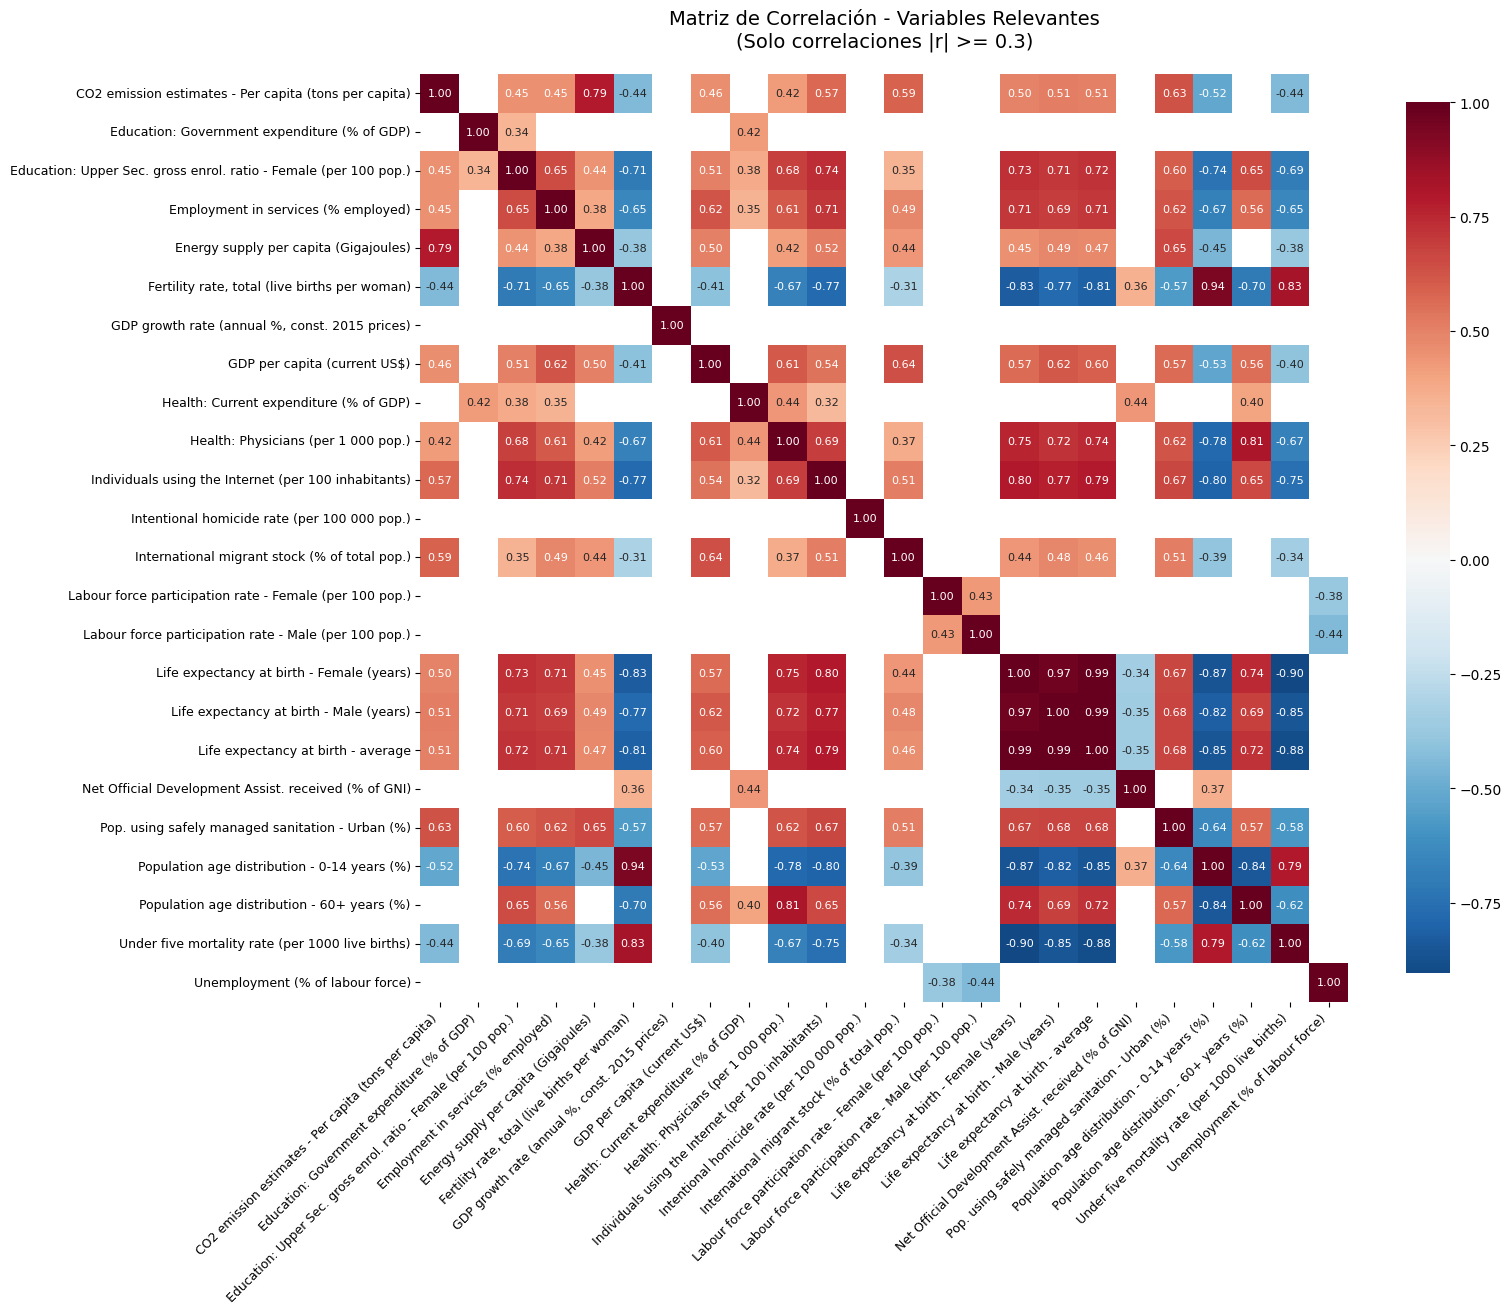

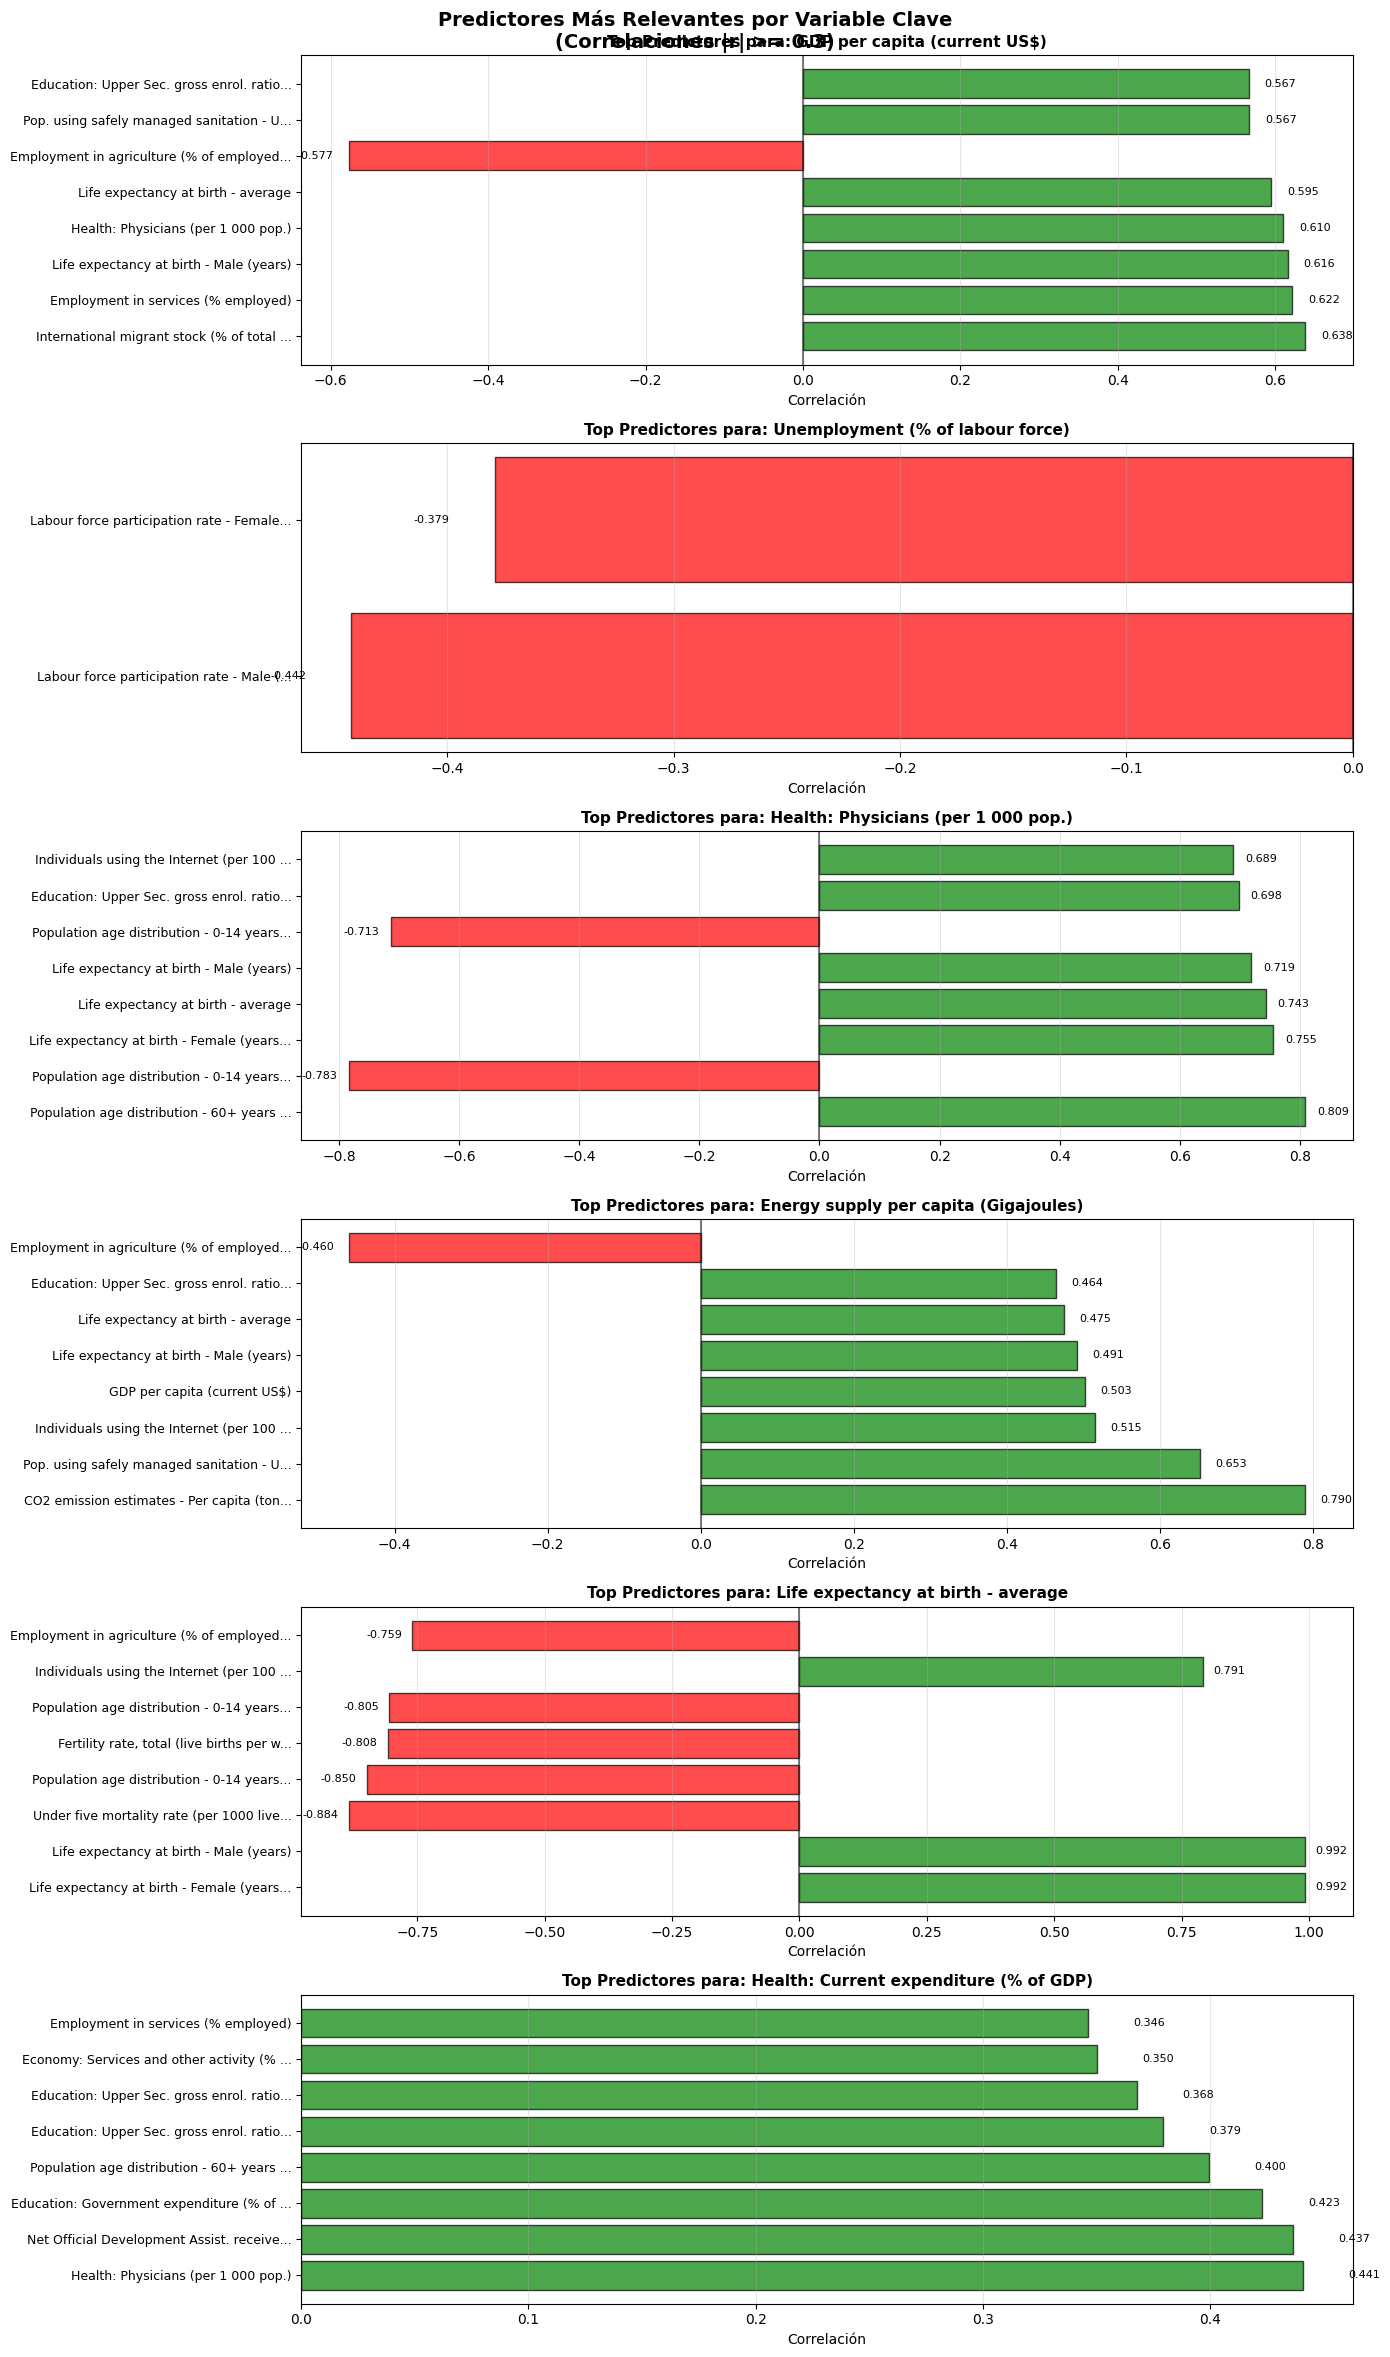


✅ Visualizaciones guardadas en src/visualization/
   • relevant_correlations_heatmap.png
   • key_variables_top_predictors.png


In [50]:
# VISUALIZACIÓN DE CORRELACIONES RELEVANTES CON KEY VARIABLES
print("📊 CREANDO VISUALIZACIONES DE CORRELACIONES RELEVANTES")
print("="*60)

# Crear matriz de correlación solo con variables relevantes
all_relevant_vars = set(key_variables)  # Empezar con key variables

# Agregar todas las variables que tienen correlación relevante
for key_var, predictors in relevant_predictors.items():
    for predictor_var, corr in predictors[:5]:  # Top 5 predictores por variable clave
        all_relevant_vars.add(predictor_var)

relevant_vars_list = list(all_relevant_vars)
relevant_vars_list.sort()

print(f"Variables incluidas en visualización: {len(relevant_vars_list)}")
print(f"Criterio: Variables clave + top predictores con |r| >= {CORRELATION_THRESHOLD}")

if len(relevant_vars_list) <= 25:  # Solo crear heatmap si no es demasiado grande
    # Crear matriz de correlación para variables relevantes
    relevant_corr_matrix = df[relevant_vars_list].corr()
    
    # Heatmap de correlaciones relevantes
    plt.figure(figsize=(16, 14))
    
    # Crear máscara para mostrar solo correlaciones relevantes
    mask = np.zeros_like(relevant_corr_matrix, dtype=bool)
    for i in range(len(relevant_corr_matrix)):
        for j in range(len(relevant_corr_matrix)):
            if i != j and abs(relevant_corr_matrix.iloc[i, j]) < CORRELATION_THRESHOLD:
                mask[i, j] = True
    
    sns.heatmap(relevant_corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                annot_kws={'size': 8})
    
    plt.title(f'Matriz de Correlación - Variables Relevantes\n(Solo correlaciones |r| >= {CORRELATION_THRESHOLD})', 
              fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.savefig("../src/visualization/relevant_correlations_heatmap.png", dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
else:
    print(f"⚠️  Demasiadas variables ({len(relevant_vars_list)}) para heatmap legible")
    print("Creando visualización alternativa...")

# Crear gráfico de barras con las correlaciones más fuertes por variable clave
n_key_vars = len([k for k in key_variables if k in relevant_predictors and relevant_predictors[k]])
if n_key_vars > 0:
    fig, axes = plt.subplots(n_key_vars, 1, figsize=(14, 4 * n_key_vars))
    if n_key_vars == 1:
        axes = [axes]
    
    plot_idx = 0
    for key_var in key_variables:
        if key_var in relevant_predictors and relevant_predictors[key_var]:
            predictors_data = relevant_predictors[key_var][:8]  # Top 8 predictores
            
            if predictors_data:
                predictor_names = [name for name, _ in predictors_data]
                correlations = [corr for _, corr in predictors_data]
                
                # Colores según el signo de la correlación
                colors = ['green' if corr > 0 else 'red' for corr in correlations]
                
                # Crear gráfico de barras horizontal
                y_pos = np.arange(len(predictor_names))
                bars = axes[plot_idx].barh(y_pos, correlations, color=colors, alpha=0.7, edgecolor='black')
                
                # Personalizar el gráfico
                axes[plot_idx].set_yticks(y_pos)
                axes[plot_idx].set_yticklabels([name[:40] + '...' if len(name) > 40 else name 
                                              for name in predictor_names], fontsize=9)
                axes[plot_idx].set_xlabel('Correlación')
                axes[plot_idx].set_title(f'Top Predictores para: {key_var}', fontsize=11, fontweight='bold')
                axes[plot_idx].grid(True, alpha=0.3, axis='x')
                axes[plot_idx].axvline(x=0, color='black', linestyle='-', alpha=0.5)
                
                # Agregar valores en las barras
                for i, (bar, corr) in enumerate(zip(bars, correlations)):
                    width = bar.get_width()
                    axes[plot_idx].text(width + (0.02 if width > 0 else -0.02), bar.get_y() + bar.get_height()/2,
                                       f'{corr:.3f}', ha='left' if width > 0 else 'right', va='center', fontsize=8)
                
                plot_idx += 1
    
    plt.suptitle(f'Predictores Más Relevantes por Variable Clave\n(Correlaciones |r| >= {CORRELATION_THRESHOLD})', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig("../src/visualization/key_variables_top_predictors.png", dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

print(f"\n✅ Visualizaciones guardadas en src/visualization/")
print(f"   • relevant_correlations_heatmap.png")
print(f"   • key_variables_top_predictors.png")

In [ ]:
# TABLA RESUMEN PARA SELECCIÓN DE FEATURES EN ML
print("🤖 TABLA RESUMEN PARA MACHINE LEARNING")
print("="*60)

# Crear DataFrame resumen para cada variable clave con sus mejores predictores
ml_feature_summary = []

for key_var in key_variables:
    if key_var in relevant_predictors and relevant_predictors[key_var]:
        predictors_data = relevant_predictors[key_var]
        
        # Información de la variable target
        target_info = {
            'Target_Variable': key_var,
            'ML_Task': 'Classification' if key_var == "GDP per capita (current US$)" else 'Regression',
            'Num_Relevant_Predictors': len(predictors_data),
            'Best_Predictor': predictors_data[0][0] if predictors_data else 'None',
            'Best_Correlation': predictors_data[0][1] if predictors_data else 0,
            'Strong_Predictors': len([corr for _, corr in predictors_data if abs(corr) >= 0.7]),
            'Moderate_Predictors': len([corr for _, corr in predictors_data if 0.5 <= abs(corr) < 0.7]),
            'Weak_Predictors': len([corr for _, corr in predictors_data if 0.3 <= abs(corr) < 0.5])
        }
        ml_feature_summary.append(target_info)

# Convertir a DataFrame
ml_summary_df = pd.DataFrame(ml_feature_summary)

if not ml_summary_df.empty:
    print("📋 RESUMEN PARA MODELOS ML:")
    print("-" * 80)
    print(ml_summary_df.to_string(index=False))
    
    print(f"\n🎯 RECOMENDACIONES PARA FEATURE SELECTION:")
    print("-" * 50)
    
    for _, row in ml_summary_df.iterrows():
        target = row['Target_Variable']
        task = row['ML_Task']
        strong = row['Strong_Predictors']
        moderate = row['Moderate_Predictors']
        weak = row['Weak_Predictors']
        
        print(f"\n• {target} ({task}):")
        
        if strong >= 3:
            print(f"  ✅ Excelente: {strong} predictores fuertes - Modelo prometedor")
        elif strong + moderate >= 5:
            print(f"  🟡 Bueno: {strong} fuertes + {moderate} moderados - Modelo viable")
        elif strong + moderate + weak >= 3:
            print(f"  ⚠️  Regular: Solo {strong + moderate + weak} predictores - Puede requerir feature engineering")
        else:
            print(f"  ❌ Problemático: Muy pocos predictores relevantes - Revisar datos o umbral")
    
    # Crear lista final de features recomendadas por fuerza de correlación
    print(f"\n📊 FEATURES RECOMENDADAS POR CATEGORÍA:")
    print("-" * 50)
    
    strong_features = set()
    moderate_features = set()
    weak_features = set()
    
    for key_var, predictors_data in relevant_predictors.items():
        for predictor, corr in predictors_data:
            if abs(corr) >= 0.7:
                strong_features.add(predictor)
            elif abs(corr) >= 0.5:
                moderate_features.add(predictor)
            else:
                weak_features.add(predictor)
    
    print(f"\n🟢 FEATURES FUERTES (|r| >= 0.7) - USAR DEFINITIVAMENTE:")
    if strong_features:
        for i, feature in enumerate(sorted(strong_features), 1):
            print(f"   {i:2d}. {feature}")
    else:
        print("   No hay features con correlación fuerte")
    
    print(f"\n🟡 FEATURES MODERADAS (0.5 <= |r| < 0.7) - CONSIDERAR:")
    if moderate_features:
        for i, feature in enumerate(sorted(moderate_features), 1):
            if i <= 10:  # Mostrar solo los primeros 10
                print(f"   {i:2d}. {feature}")
        if len(moderate_features) > 10:
            print(f"   ... y {len(moderate_features) - 10} más")
    else:
        print("   No hay features con correlación moderada")
    
    print(f"\n🔵 FEATURES DÉBILES (0.3 <= |r| < 0.5) - EVALUAR:")
    print(f"   Total: {len(weak_features)} features")
    print("   (Considerar para análisis exploratorio o feature engineering)")
    
    # Guardar resumen en variable global para uso posterior
    globals()['ml_features_strong'] = list(strong_features)
    globals()['ml_features_moderate'] = list(moderate_features)
    globals()['ml_features_weak'] = list(weak_features)
    globals()['ml_summary'] = ml_summary_df
    
    print(f"\n💾 Variables guardadas para uso posterior:")
    print(f"   • ml_features_strong: {len(strong_features)} features")
    print(f"   • ml_features_moderate: {len(moderate_features)} features") 
    print(f"   • ml_features_weak: {len(weak_features)} features")
    print(f"   • ml_summary: DataFrame con resumen completo")
    
else:
    print("❌ No se pudo crear resumen - No hay predictores relevantes encontrados")

print(f"\n✅ Análisis de features para ML completado")
print(f"Umbral utilizado: |r| >= {CORRELATION_THRESHOLD}")
print("Listo para proceder con feature selection y modelado")

Variables económicas clave disponibles: 8/8
Variables adicionales seleccionadas: 14
Total de variables para correlación: 22

Variables incluidas en el análisis de correlación:
VARIABLES ECONÓMICAS CLAVE:
 1. GDP per capita (current US$)
 2. GDP growth rate (annual %, const. 2015 prices)
 3. Unemployment (% of labour force)
 4. Health: Physicians (per 1 000 pop.)
 5. Energy supply per capita (Gigajoules)
 6. Life expectancy at birth - average
 7. Intentional homicide rate (per 100 000 pop.)
 8. Health: Current expenditure (% of GDP)

VARIABLES ADICIONALES:
 1. Agricultural production index (2014-2016=100)
 2. Balance of payments, current account (million US$)
 3. CPI: Consumer Price Index (2010=100)
 4. Economy: Agriculture (% of Gross Value Added)
 5. Economy: Industry (% of Gross Value Added)
 6. Economy: Services and other activity (% of GVA)
 7. Employment in agriculture (% of employed)
 8. Employment in industry (% of employed)
 9. Employment in services (% employed)
10. GDP: Gross

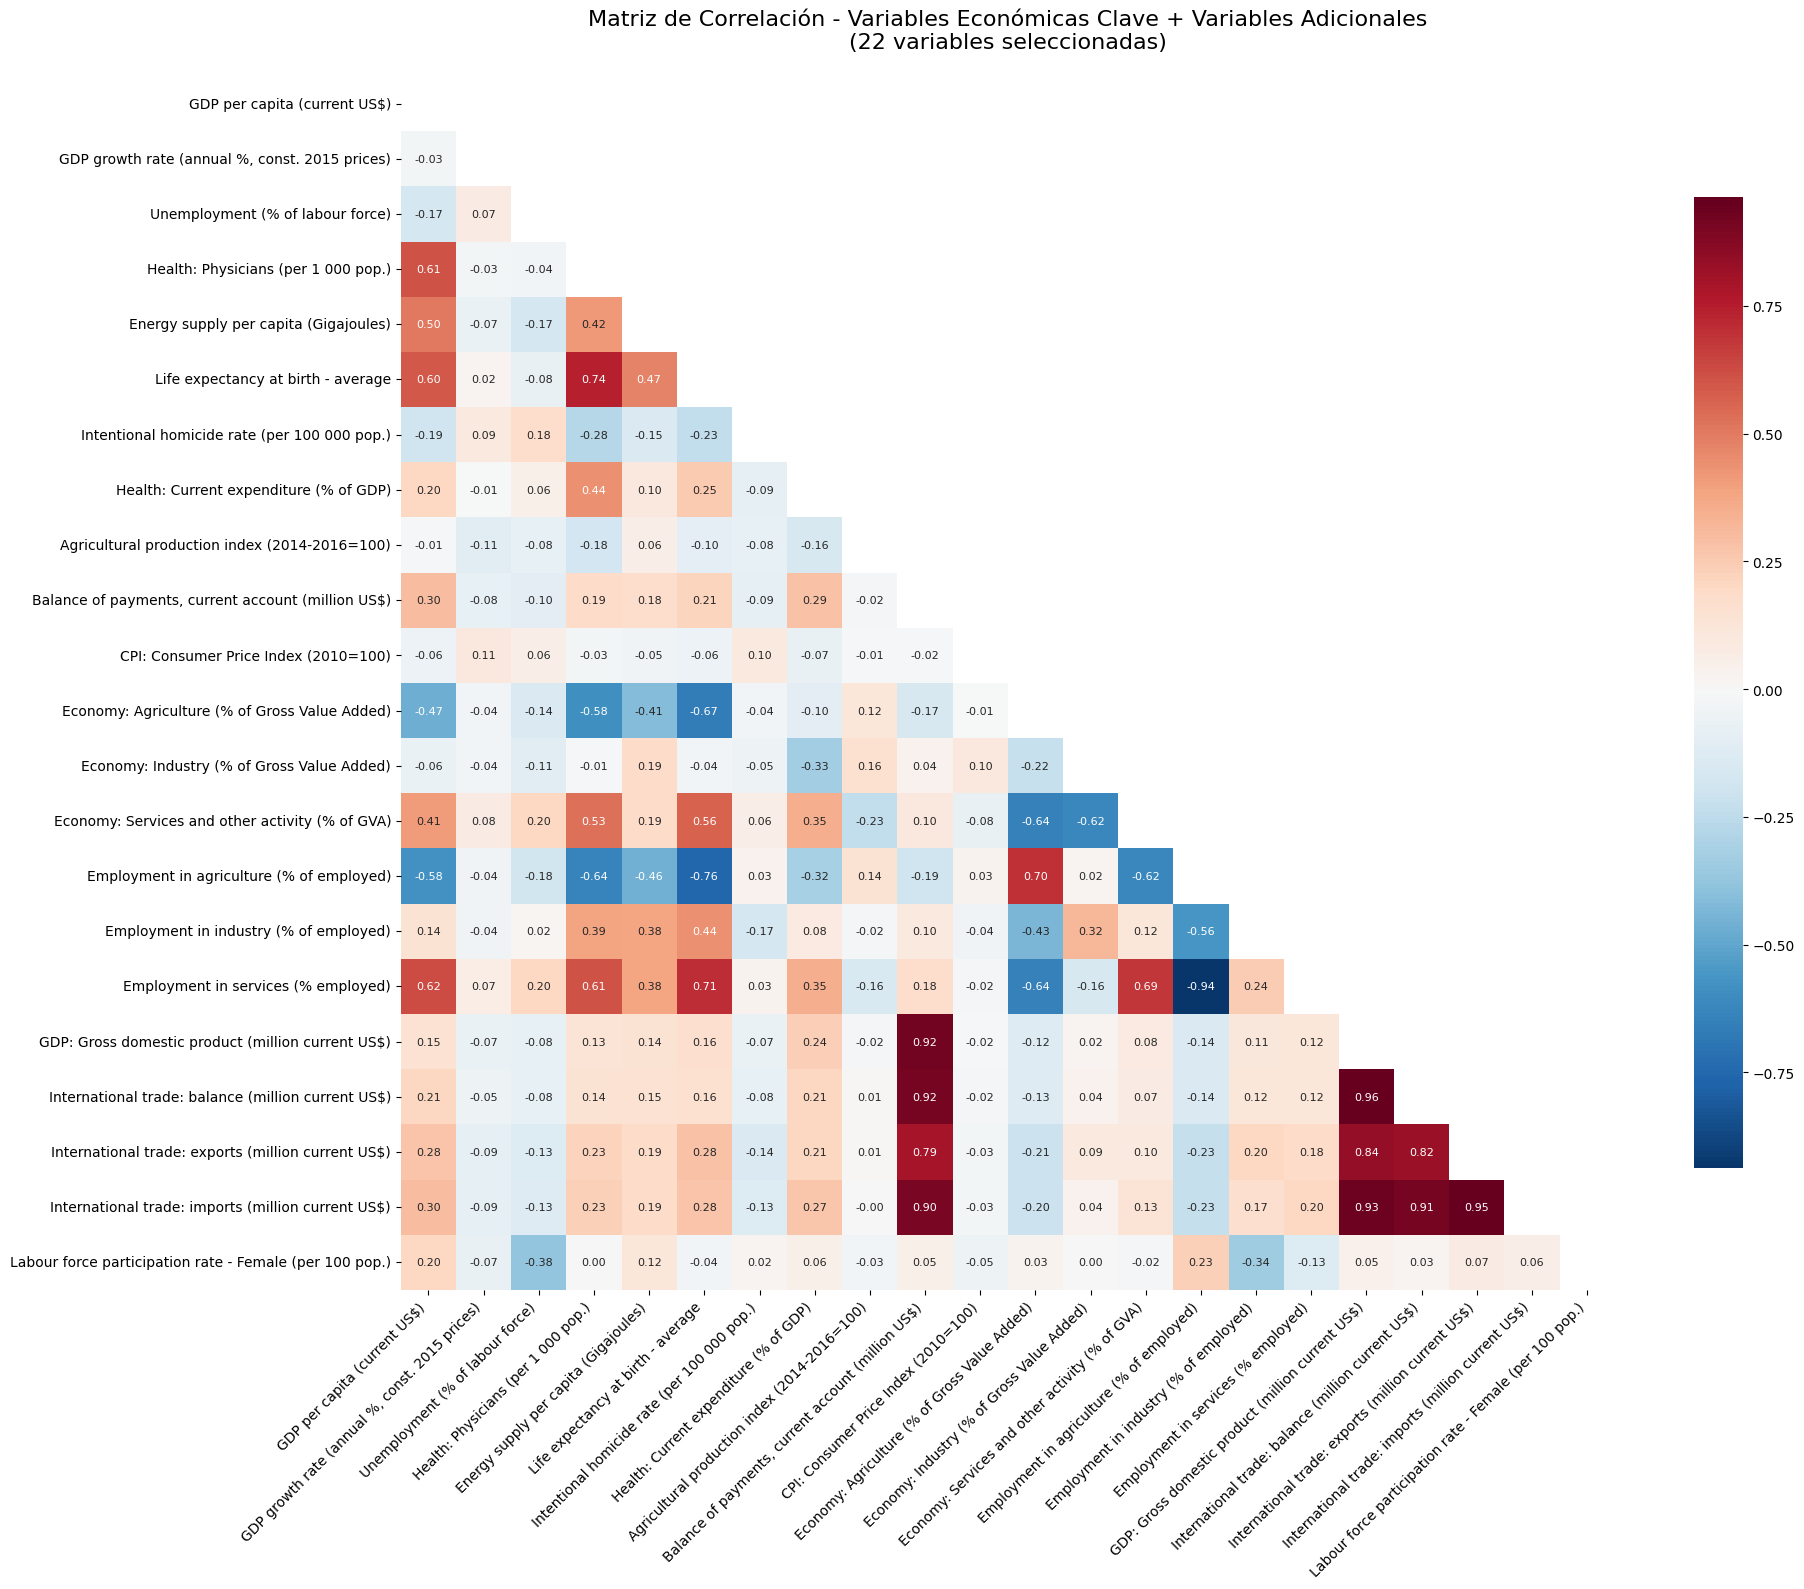


CORRELACIONES MÁS FUERTES CON VARIABLES ECONÓMICAS CLAVE:

GDP per capita (current US$):
--------------------------------------------------
  Correlaciones positivas más fuertes:
    • Employment in services (% employed) r = +0.622
    • Health: Physicians (per 1 000 pop.) r = +0.610
    • Life expectancy at birth - average  r = +0.595
  Correlaciones negativas más fuertes:
    • Employment in agriculture (% of employed) r = -0.577
    • Economy: Agriculture (% of Gross Value Added) r = -0.469
    • Intentional homicide rate (per 100 000 pop.) r = -0.195

GDP growth rate (annual %, const. 2015 prices):
--------------------------------------------------
  Correlaciones positivas más fuertes:
    • CPI: Consumer Price Index (2010=100) r = +0.108
    • Intentional homicide rate (per 100 000 pop.) r = +0.093
    • Economy: Services and other activity (% of GVA) r = +0.075
  Correlaciones negativas más fuertes:
    • Agricultural production index (2014-2016=100) r = -0.110
    • Internatio

In [88]:
# Heatmap de correlación para variables clave económicas + 15 variables adicionales
# Combinar key_variables con las mejores variables adicionales

# Primero asegurar que key_variables están en good_columns
key_vars_in_good = [var for var in key_variables if var in good_columns]
print(f"Variables económicas clave disponibles: {len(key_vars_in_good)}/{len(key_variables)}")

# Obtener variables adicionales (excluyendo las ya incluidas en key_variables)
additional_vars = [var for var in good_columns if var not in key_variables][:15]
additional_vars.remove("Year")
print(f"Variables adicionales seleccionadas: {len(additional_vars)}")

# Combinar todas las variables para el análisis
selected_cols = key_vars_in_good + additional_vars
print(f"Total de variables para correlación: {len(selected_cols)}")

print("\nVariables incluidas en el análisis de correlación:")
print("="*60)
print("VARIABLES ECONÓMICAS CLAVE:")
for i, var in enumerate(key_vars_in_good, 1):
    print(f"{i:2d}. {var}")

print(f"\nVARIABLES ADICIONALES:")
for i, var in enumerate(additional_vars, 1):
    print(f"{i:2d}. {var}")

# Calcular matriz de correlación
correlation_matrix = df[selected_cols].corr()

# Crear heatmap con ajustes para mejor visualización
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})  # Texto más pequeño para mejor legibilidad

plt.title(f'Matriz de Correlación - Variables Económicas Clave + Variables Adicionales\n({len(selected_cols)} variables seleccionadas)', 
          fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Mostrar resumen de correlaciones más fuertes con las variables económicas clave
print(f"\nCORRELACIONES MÁS FUERTES CON VARIABLES ECONÓMICAS CLAVE:")
print("="*80)

for key_var in key_vars_in_good:
    correlations_with_key = correlation_matrix[key_var].drop(key_var)  # Excluir correlación consigo misma
    correlations_with_key = correlations_with_key.dropna()
    
    if len(correlations_with_key) > 0:
        # Top 3 correlaciones positivas y negativas
        top_positive = correlations_with_key[correlations_with_key > 0].nlargest(3)
        top_negative = correlations_with_key[correlations_with_key < 0].nsmallest(3)
        
        print(f"\n{key_var}:")
        print("-" * 50)
        
        if len(top_positive) > 0:
            print("  Correlaciones positivas más fuertes:")
            for var, corr in top_positive.items():
                print(f"    • {var:<35} r = {corr:+.3f}")
        
        if len(top_negative) > 0:
            print("  Correlaciones negativas más fuertes:")
            for var, corr in top_negative.items():
                print(f"    • {var:<35} r = {corr:+.3f}")

In [65]:
# Identificar las correlaciones más fuertes
# Convertir la matriz de correlación a formato largo, excluyendo la diagonal
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_value):
            correlation_pairs.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlacion': corr_value,
                'Correlacion_Abs': abs(corr_value)
            })

# Convertir a DataFrame y ordenar por correlación absoluta
corr_df = pd.DataFrame(correlation_pairs)
corr_df = corr_df.sort_values('Correlacion_Abs', ascending=False)

print("TOP 15 CORRELACIONES MÁS FUERTES:")
print("="*60)
for idx, row in corr_df.head(15).iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")
    
print("\nTOP 10 CORRELACIONES POSITIVAS MÁS FUERTES:")
print("="*60)
positive_corr = corr_df[corr_df['Correlacion'] > 0].head(10)
for idx, row in positive_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

print("\nTOP 10 CORRELACIONES NEGATIVAS MÁS FUERTES:")
print("="*60)
negative_corr = corr_df[corr_df['Correlacion'] < 0].head(10)
for idx, row in negative_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

TOP 15 CORRELACIONES MÁS FUERTES:
GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$) | r = 0.962
International trade: exports (million current US$) ↔ International trade: imports (million current US$) | r = 0.948
Employment in agriculture (% of employed) ↔ Employment in services (% employed) | r = -0.938
GDP: Gross domestic product (million current US$) ↔ International trade: imports (million current US$) | r = 0.935
Balance of payments, current account (million US$) ↔ GDP: Gross domestic product (million current US$) | r = 0.922
Balance of payments, current account (million US$) ↔ International trade: balance (million current US$) | r = 0.916
International trade: balance (million current US$) ↔ International trade: imports (million current US$) | r = 0.911
Balance of payments, current account (million US$) ↔ International trade: imports (million current US$) | r = 0.904
Labour force participation rate - Female (per 100 pop.) ↔ Labour

## 4. Análisis de Series de Tiempo

Países seleccionados para análisis temporal: ['United States of America', 'China', 'Germany', 'Brazil', 'India']


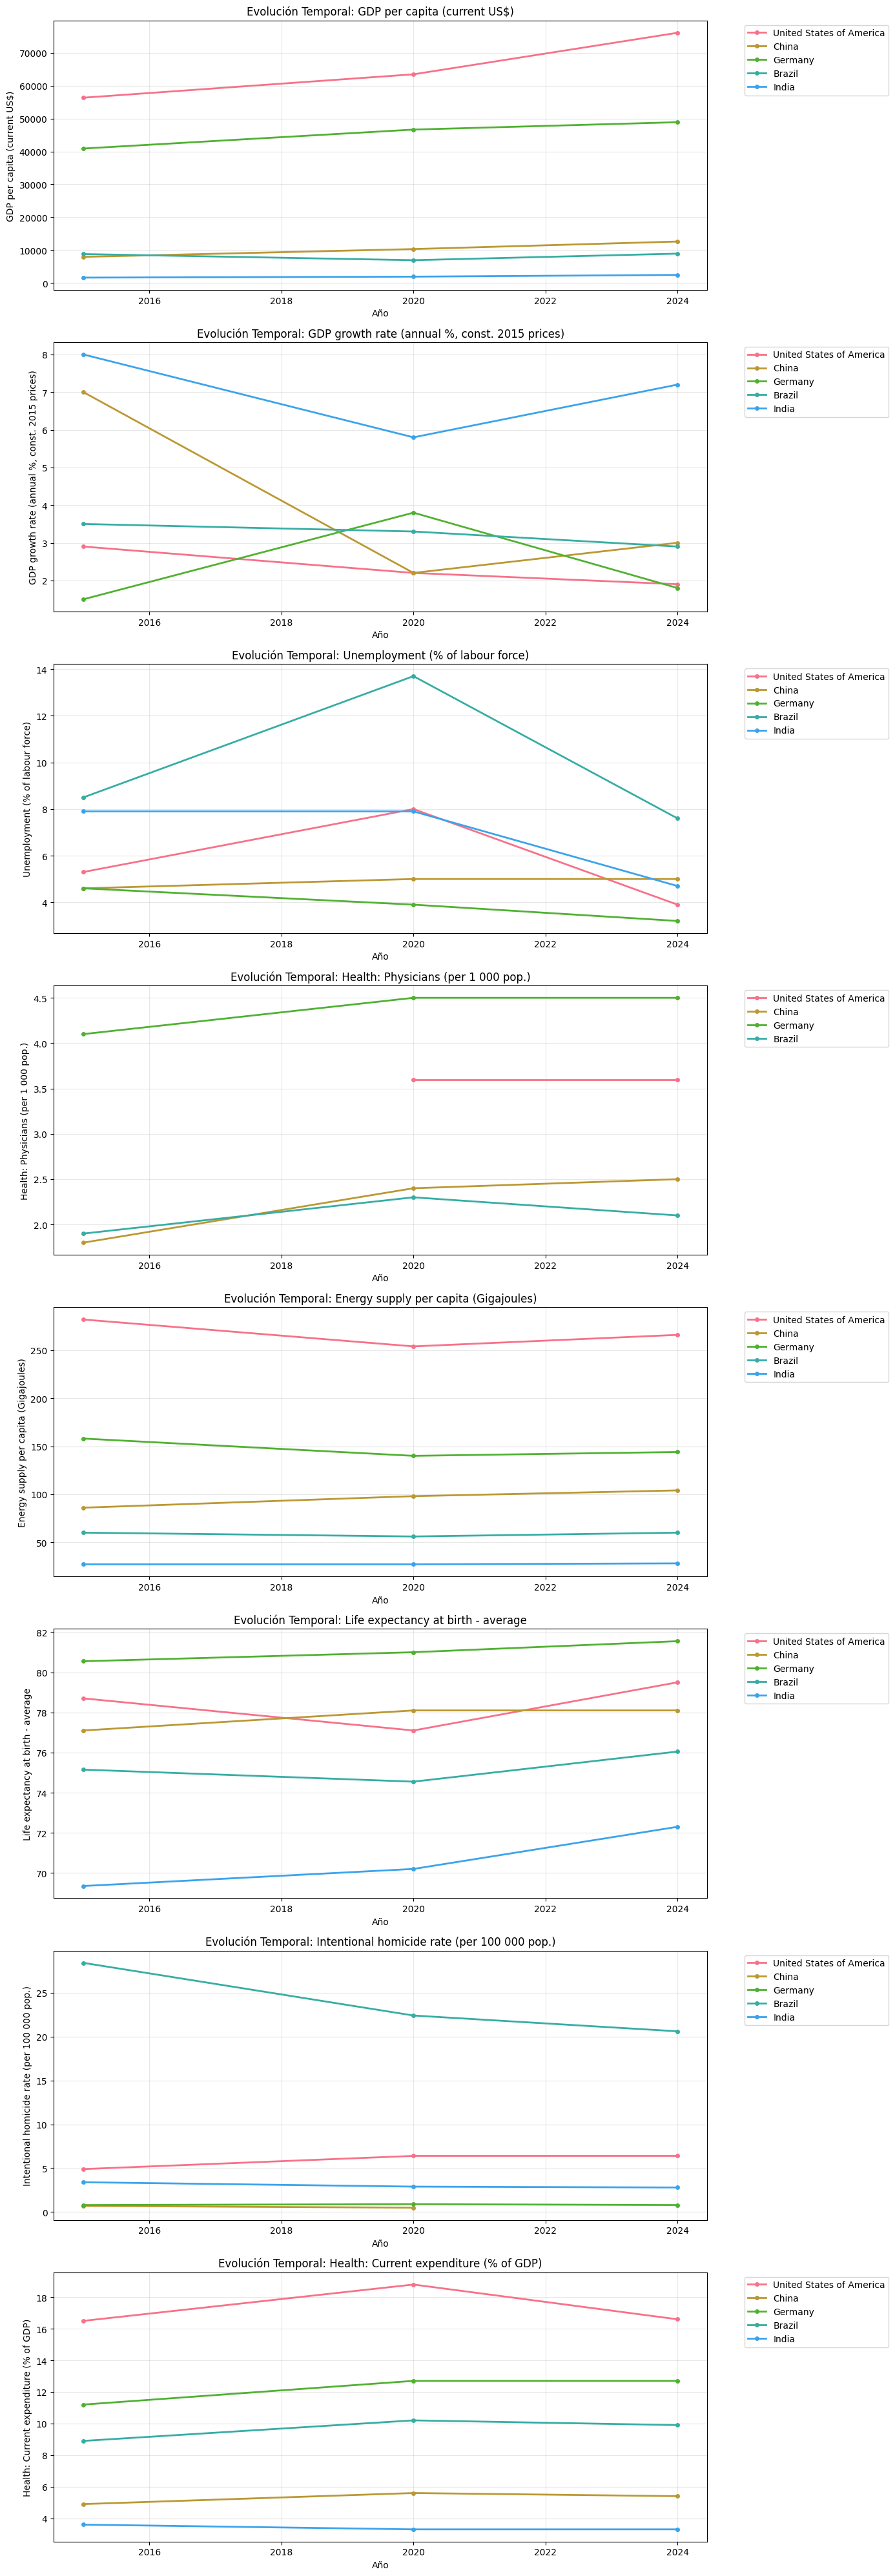

In [67]:
# Análisis de tendencias temporales para variables clave
# Seleccionar algunos países representativos y variables importantes
sample_countries = ['United States of America', 'China', 'Germany', 'Brazil', 'India']
available_countries = [country for country in sample_countries if country in df['Country'].values]

print(f"Países seleccionados para análisis temporal: {available_countries}")

time_vars = key_variables[:8] if len(key_variables) >= 8 else key_variables

fig, axes = plt.subplots(len(time_vars), 1, figsize=(14, 5*len(time_vars)))
if len(time_vars) == 1:
    axes = [axes]

for i, var in enumerate(time_vars):
    for country in available_countries:
        country_data = df[(df['Country'] == country) & 
                                (df[var].notna())].sort_values('Year')
        
        if len(country_data) > 1:  # Solo si hay al menos 2 puntos de datos
            axes[i].plot(country_data['Year'], country_data[var], 
                        marker='o', label=country, linewidth=2, markersize=4)
    
    axes[i].set_title(f'Evolución Temporal: {var}', fontsize=12)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel(var)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análisis por Regiones

In [69]:
df["Region"].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Oceania', 'Western Europe', 'Eastern Europe', 'Central America',
       'Western Africa', 'Northern America', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern Europe',
       'Eastern Asia', 'Melanesia', 'Micronesia', 'Central Asia'],
      dtype=object)

In [74]:
# Crear agrupaciones de regiones más manejables para el análisis


# Verificar el mapeo
print("MAPEO DE REGIONES ORIGINALES A GRUPOS:")
print("="*50)
for original, grouped in sorted(region_mapping.items()):
    count = len(df[df['Region'] == original])
    print(f"{original:<20} → {grouped:<12} ({count} observaciones)")

print(f"\nRESUMEN DE AGRUPACIONES:")
print("="*30)
grouped_counts = df['Region_Grouped'].value_counts().sort_index()
for group, count in grouped_counts.items():
    if pd.notna(group):
        unique_countries = df[df['Region_Grouped'] == group]['Country'].nunique()
        print(f"{group:<12}: {count:>4} observaciones, {unique_countries:>2} países únicos")

# Verificar si hay regiones sin mapear
unmapped = df[df['Region_Grouped'].isna() & df['Region'].notna()]
if len(unmapped) > 0:
    print(f"\n⚠️  REGIONES SIN MAPEAR:")
    print(unmapped['Region'].unique())
else:
    print(f"\n✅ Todas las regiones fueron mapeadas correctamente")

print(f"\nReducción: {df['Region'].nunique()} regiones → {df['Region_Grouped'].nunique()} grupos")

MAPEO DE REGIONES ORIGINALES A GRUPOS:
Caribbean            → Americas     (78 observaciones)
Central America      → Americas     (24 observaciones)
Central Asia         → Asia         (15 observaciones)
Eastern Africa       → Africa       (60 observaciones)
Eastern Asia         → Asia         (21 observaciones)
Eastern Europe       → Europe       (30 observaciones)
Melanesia            → Oceania      (15 observaciones)
Micronesia           → Oceania      (21 observaciones)
Middle Africa        → Africa       (27 observaciones)
Northern Africa      → Africa       (21 observaciones)
Northern America     → Americas     (15 observaciones)
Northern Europe      → Europe       (39 observaciones)
Oceania              → Oceania      (6 observaciones)
Polynesia            → Oceania      (27 observaciones)
South America        → Americas     (42 observaciones)
South-eastern Asia   → Asia         (33 observaciones)
Southern Africa      → Africa       (15 observaciones)
Southern Asia        → Asia

Grupos de regiones disponibles para análisis: 5 grupos
Grupos incluidos:
1. Africa      : 174 observaciones, 58 países únicos
2. Americas    : 159 observaciones, 53 países únicos
3. Asia        : 150 observaciones, 50 países únicos
4. Europe      : 144 observaciones, 48 países únicos
5. Oceania     :  69 observaciones, 23 países únicos

Creando visualización consolidada para 8 variables económicas clave
Procesando variable 1/8: GDP per capita (current US$)
Procesando variable 2/8: GDP growth rate (annual %, const. 2015 prices)
Procesando variable 3/8: Unemployment (% of labour force)
Procesando variable 4/8: Health: Physicians (per 1 000 pop.)
Procesando variable 5/8: Energy supply per capita (Gigajoules)
Procesando variable 6/8: Life expectancy at birth - average
Procesando variable 7/8: Intentional homicide rate (per 100 000 pop.)
Procesando variable 8/8: Health: Current expenditure (% of GDP)


/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/645509936.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True

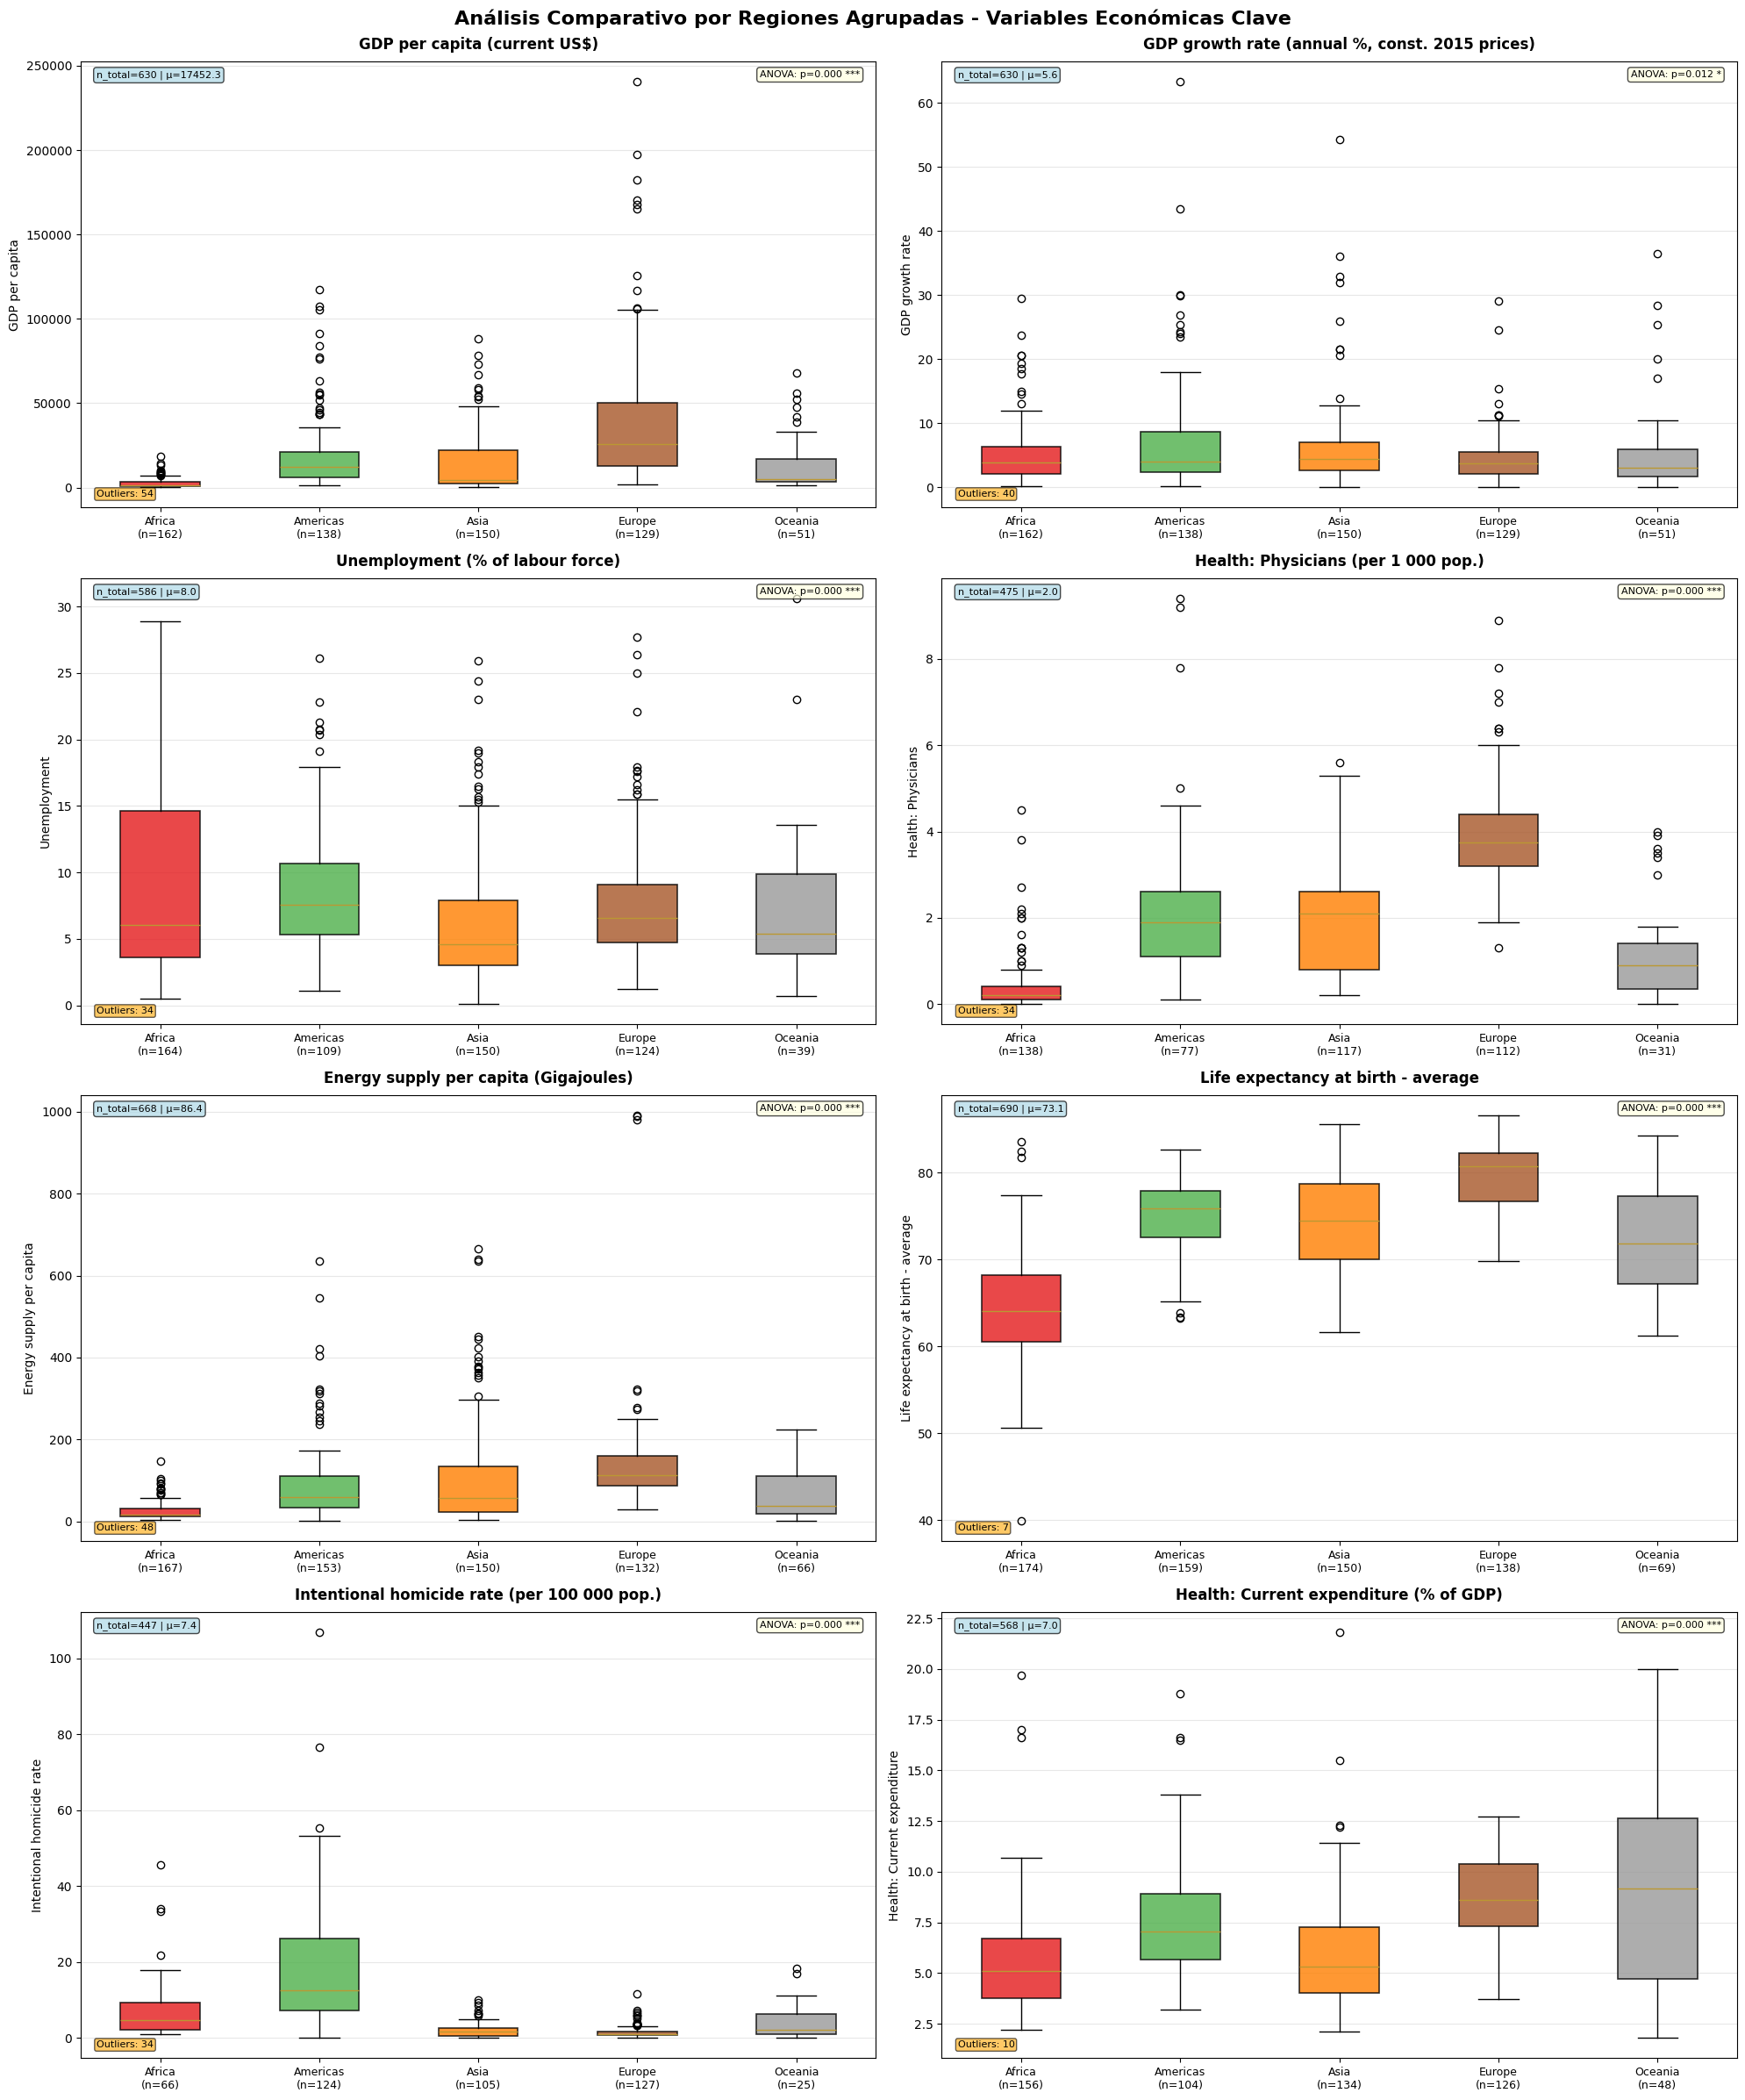


RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES

GDP per capita (current US$):
--------------------------------------------------
                count      mean    median       std
Region_Grouped                                     
Europe            129  39861.90  25773.30  42285.55
Americas          138  19433.47  12085.75  21979.14
Asia              150  13888.97   4500.50  18171.42
Oceania            51  13535.22   5105.10  16183.13
Africa            162   2452.34   1390.60   2828.86

ANOVA: F=45.511, p=0.0000 (Muy significativo)

GDP growth rate (annual %, const. 2015 prices):
--------------------------------------------------
                count  mean  median   std
Region_Grouped                           
Americas          138  7.03    3.95  8.57
Asia              150  5.95    4.40  6.90
Oceania            51  5.63    3.00  7.44
Africa            162  4.95    3.85  4.56
Europe            129  4.51    3.70  4.04

ANOVA: F=3.224, p=0.0124 (Moderadamente significativo)

Unemployment 

In [76]:
# Comparación completa de variables por región agrupada - Todas las variables en una sola visualización
# Usar las regiones agrupadas (5 grupos) en lugar de las 22 regiones originales
# Layout: 2 columnas x 4 filas para mostrar las 8 variables clave

regions_grouped = df['Region_Grouped'].unique()
regions_grouped = regions_grouped[~pd.isna(regions_grouped)]  # Eliminar valores NaN
regions_grouped = sorted(regions_grouped)  # Ordenar alfabéticamente para consistencia

print(f"Grupos de regiones disponibles para análisis: {len(regions_grouped)} grupos")
print("Grupos incluidos:")
for i, region_group in enumerate(regions_grouped, 1):
    count = len(df[df['Region_Grouped'] == region_group])
    unique_countries = df[df['Region_Grouped'] == region_group]['Country'].nunique()
    print(f"{i}. {region_group:<12}: {count:>3} observaciones, {unique_countries:>2} países únicos")

print(f"\nCreando visualización consolidada para {len(key_variables)} variables económicas clave")

# Crear figura con subplots: 2 columnas x 4 filas
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

# Colores consistentes para cada grupo regional
region_colors = plt.cm.Set1(np.linspace(0, 1, len(regions_grouped)))
color_map = dict(zip(regions_grouped, region_colors))

# Procesar cada variable
for var_idx, var in enumerate(key_variables):
    print(f"Procesando variable {var_idx+1}/{len(key_variables)}: {var}")
    
    # Preparar datos para esta variable específica usando regiones agrupadas
    region_data = []
    region_labels = []
    region_counts = []
    valid_regions = []
    
    for region_group in regions_grouped:
        region_values = df[df['Region_Grouped'] == region_group][var].dropna()
        if len(region_values) >= 3:  # Al menos 3 observaciones para ser incluida
            region_data.append(region_values)
            # Crear etiqueta con nombre de grupo y número de observaciones
            region_labels.append(f"{region_group}\n(n={len(region_values)})")
            region_counts.append(len(region_values))
            valid_regions.append(region_group)
    
    if len(region_data) >= 2:  # Solo crear gráfico si hay al menos 2 grupos con datos
        # Crear boxplot en el subplot correspondiente
        bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
        
        # Aplicar colores consistentes
        for patch, region in zip(bp['boxes'], valid_regions):
            patch.set_facecolor(color_map[region])
            patch.set_alpha(0.8)
            patch.set_edgecolor('black')
            patch.set_linewidth(1.2)
        
        # Personalizar el subplot
        axes[var_idx].set_title(f'{var}', fontsize=12, fontweight='bold', pad=10)
        axes[var_idx].set_ylabel(var.split('(')[0].strip() if '(' in var else var, fontsize=10)
        axes[var_idx].tick_params(axis='x', rotation=0, labelsize=9)
        axes[var_idx].grid(True, alpha=0.3, axis='y')
        
        # Añadir estadísticas básicas como texto pequeño
        stats_text = f"n_total={sum(region_counts)} | μ={df[var].mean():.1f}"
        axes[var_idx].text(0.02, 0.98, stats_text, transform=axes[var_idx].transAxes, 
                          verticalalignment='top', fontsize=8,
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
        
        # Calcular y mostrar test ANOVA
        try:
            from scipy.stats import f_oneway
            if len(region_data) > 1:
                f_stat, p_value = f_oneway(*region_data)
                significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                anova_text = f"ANOVA: p={p_value:.3f} {significance}"
                axes[var_idx].text(0.98, 0.98, anova_text, transform=axes[var_idx].transAxes, 
                                  verticalalignment='top', horizontalalignment='right', fontsize=8,
                                  bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))
        except Exception:
            pass
        
        # Añadir información de outliers de forma compacta
        total_outliers = 0
        for data in region_data:
            Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
            IQR = Q3 - Q1
            outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
            total_outliers += len(outliers)
        
        if total_outliers > 0:
            axes[var_idx].text(0.02, 0.02, f"Outliers: {total_outliers}", 
                              transform=axes[var_idx].transAxes, 
                              verticalalignment='bottom', fontsize=8,
                              bbox=dict(boxstyle='round,pad=0.2', facecolor='orange', alpha=0.6))
        
    else:
        # Si no hay suficientes datos, mostrar mensaje
        axes[var_idx].text(0.5, 0.5, f'Datos insuficientes\npara {var}', 
                          transform=axes[var_idx].transAxes, ha='center', va='center',
                          fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        axes[var_idx].set_title(f'{var} - Sin datos suficientes', fontsize=12)

# Ajustar layout y mostrar
plt.suptitle('Análisis Comparativo por Regiones Agrupadas - Variables Económicas Clave', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()

# Mostrar resumen estadístico consolidado
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES")
print("="*80)

for var in key_variables:
    print(f"\n{var}:")
    print("-" * 50)
    
    # Estadísticas por grupo regional
    region_stats = df.groupby('Region_Grouped')[var].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    # Filtrar grupos con datos suficientes
    region_stats_filtered = region_stats[region_stats['count'] >= 3].sort_values('mean', ascending=False)
    
    if not region_stats_filtered.empty:
        print(region_stats_filtered.to_string())
        
        # Test ANOVA resumido
        try:
            region_groups_anova = []
            for region_group in regions_grouped:
                group_data = df[df['Region_Grouped'] == region_group][var].dropna()
                if len(group_data) >= 3:
                    region_groups_anova.append(group_data)
            
            if len(region_groups_anova) > 1:
                f_stat, p_value = f_oneway(*region_groups_anova)
                significance = "Muy significativo" if p_value < 0.001 else "Significativo" if p_value < 0.01 else "Moderadamente significativo" if p_value < 0.05 else "No significativo"
                print(f"\nANOVA: F={f_stat:.3f}, p={p_value:.4f} ({significance})")
        except Exception:
            print("\nANOVA: No se pudo calcular")
    else:
        print("Datos insuficientes para análisis estadístico")

print(f"\n🎯 Análisis completado exitosamente")
print("Leyenda de significancia: *** p<0.001, ** p<0.01, * p<0.05, ns = no significativo")

In [82]:
# Análisis estadístico por región
print("ANÁLISIS ESTADÍSTICO POR REGIÓN")
print("="*50)

for var in comparison_vars[:2]:  # Analizar las primeras 2 variables en detalle
    print(f"\nVariable: {var}")
    print("-" * 40)
    
    region_stats = df.groupby('Region_Grouped')[var].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    # Filtrar regiones con al menos 5 observaciones
    region_stats = region_stats[region_stats['count'] >= 5]
    
    if not region_stats.empty:
        print(region_stats)
        
        # Test ANOVA para ver si hay diferencias significativas entre regiones
        from scipy.stats import f_oneway
        
        region_groups = []
        region_names = []
        for region in region_stats.index:
            region_data = df[df['Region_Grouped'] == region][var].dropna()
            if len(region_data) > 0:
                region_groups.append(region_data)
                region_names.append(region)
        
        if len(region_groups) > 1:
            try:
                f_stat, p_value = f_oneway(*region_groups)
                print(f"\nTest ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print("✓ Hay diferencias significativas entre regiones (p < 0.05)")
                else:
                    print("✗ No hay diferencias significativas entre regiones (p >= 0.05)")
            except:
                print("No se pudo realizar el test ANOVA")
    else:
        print("No hay suficientes datos para el análisis estadístico")
    
    print("\n" + "="*50)

ANÁLISIS ESTADÍSTICO POR REGIÓN

Variable: GDP per capita (current US$)
----------------------------------------
                count      mean    median       std     min       max
Region_Grouped                                                       
Africa            162   2452.34   1390.60   2828.86   262.0   18622.9
Americas          138  19433.47  12085.75  21979.14  1344.6  117568.2
Asia              150  13888.97   4500.50  18171.42   291.7   87974.2
Europe            129  39861.90  25773.30  42285.55  2023.7  240535.0
Oceania            51  13535.22   5105.10  16183.13  1404.8   67866.8

Test ANOVA F-statistic: 45.5112, p-value: 0.0000
✓ Hay diferencias significativas entre regiones (p < 0.05)


Variable: GDP growth rate (annual %, const. 2015 prices)
----------------------------------------
                count  mean  median   std  min   max
Region_Grouped                                      
Africa            162  4.95    3.85  4.56  0.1  29.5
Americas          138  7.03  

## 6. Relaciones Interesantes entre Variables

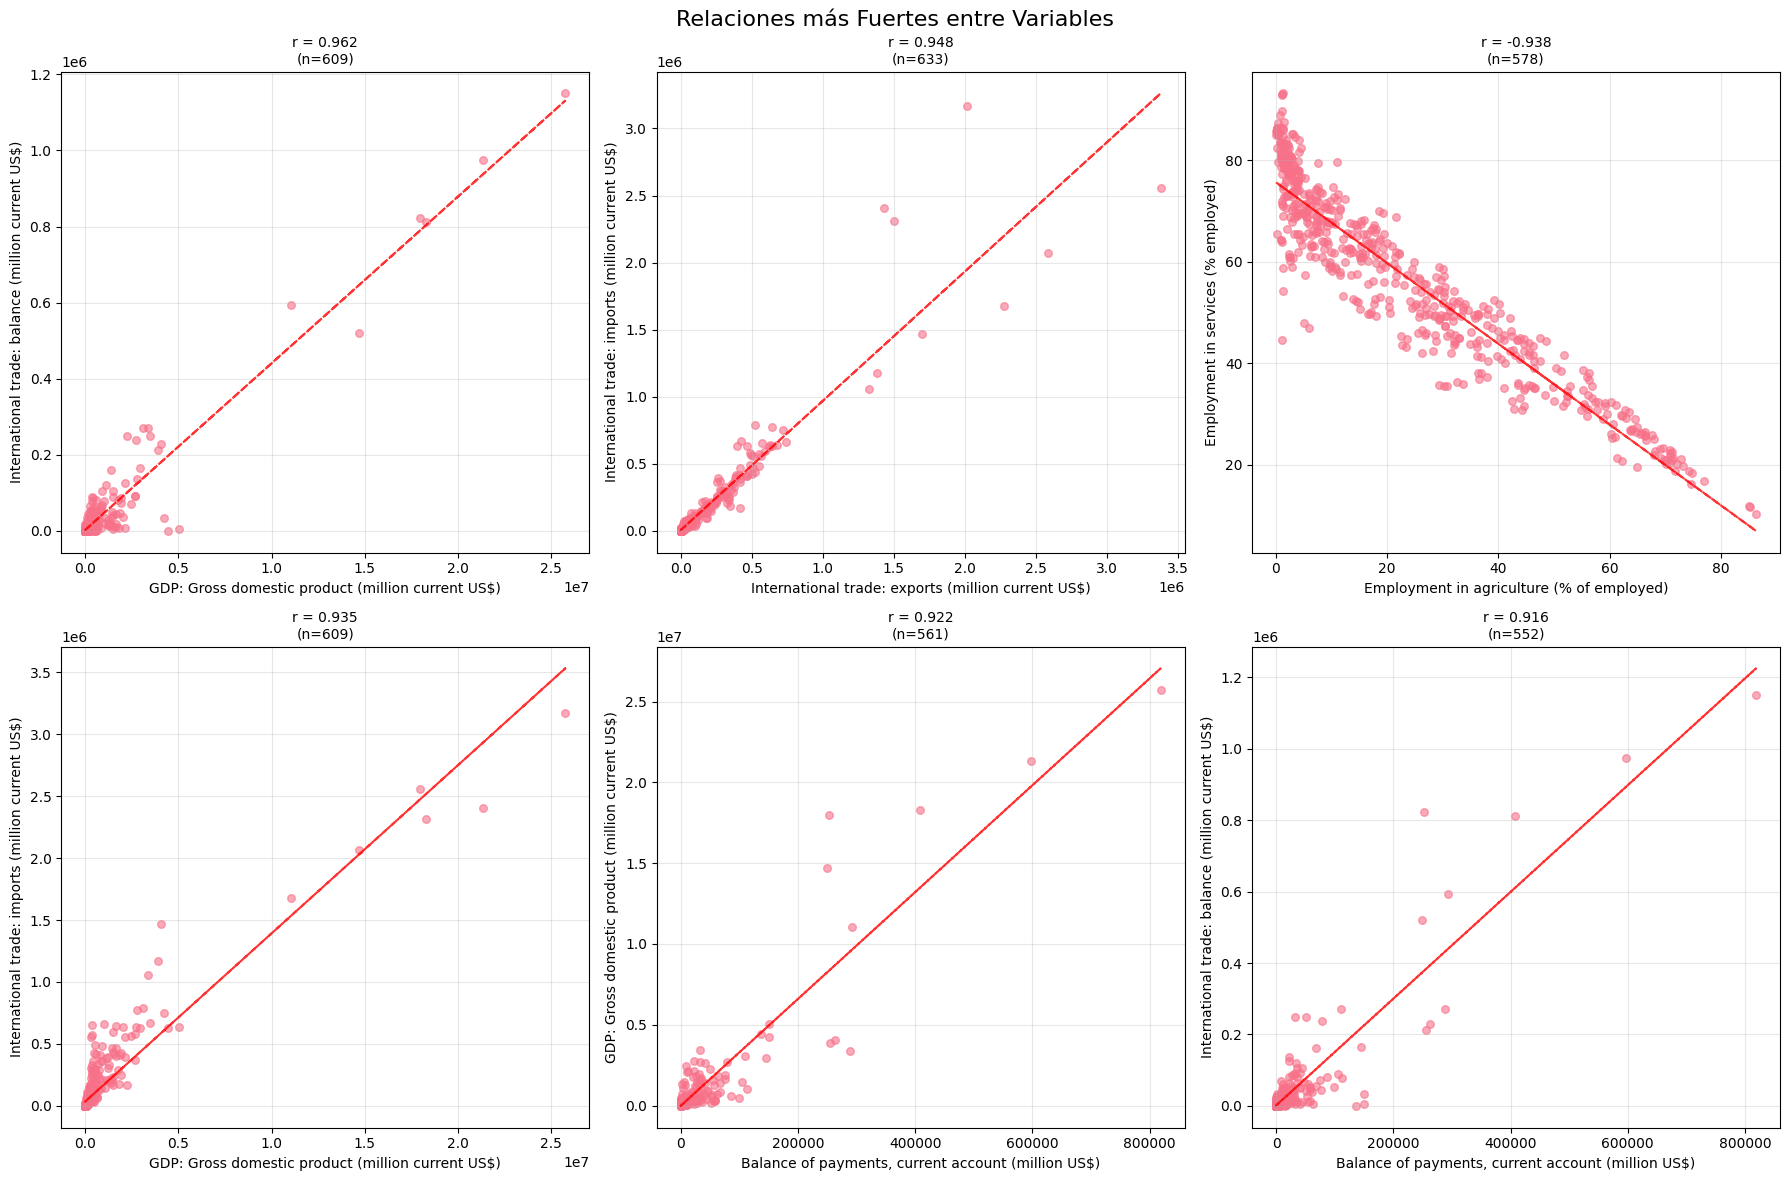

In [83]:
# Scatter plots de las correlaciones más interesantes
# Usar las correlaciones más fuertes encontradas anteriormente
if len(corr_df) > 0:
    top_correlations = corr_df.head(6)  # Top 6 correlaciones
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (_, row) in enumerate(top_correlations.iterrows()):
        var1 = row['Variable_1']
        var2 = row['Variable_2']
        corr_val = row['Correlacion']
        
        # Filtrar datos válidos
        valid_data = df[[var1, var2]].dropna()
        
        if len(valid_data) > 10:  # Al menos 10 observaciones
            # Scatter plot
            axes[i].scatter(valid_data[var1], valid_data[var2], alpha=0.6, s=30)
            
            # Línea de tendencia
            z = np.polyfit(valid_data[var1], valid_data[var2], 1)
            p = np.poly1d(z)
            axes[i].plot(valid_data[var1], p(valid_data[var1]), "r--", alpha=0.8)
            
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
            axes[i].set_title(f'r = {corr_val:.3f}\n(n={len(valid_data)})', fontsize=10)
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'Insuficientes\ndatos válidos', 
                        transform=axes[i].transAxes, ha='center', va='center')
            axes[i].set_title(f'{var1} vs {var2}')
    
    plt.suptitle('Relaciones más Fuertes entre Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron correlaciones para analizar")

## 7. Resumen de Hallazgos del EDA

In [84]:
# Generar resumen automático de los hallazgos principales
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("\n1. INFORMACIÓN GENERAL DEL DATASET:")
print(f"   • Tamaño: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"   • Países únicos: {df['Country'].nunique()}")
print(f"   • Rango temporal: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

print("\n2. CALIDAD DE LOS DATOS:")
# Calcular estadísticas de valores faltantes
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"   • Completitud general: {completeness:.1f}%")
print(f"   • Variables con <25% de valores faltantes: {len(missing_percentage[missing_percentage < 25])}")
print(f"   • Variables con >75% de valores faltantes: {len(missing_percentage[missing_percentage > 75])}")

print("\n3. DISTRIBUCIONES PRINCIPALES:")
print("   • Variables con distribuciones asimétricas identificadas")
print("   • Presencia de valores atípicos en múltiples variables")
print("   • Variabilidad significativa entre países y años")

# Verificar si corr_df existe
try:
    if len(corr_df) > 0:
        print("\n4. CORRELACIONES DESTACADAS:")
        strongest_positive = corr_df[corr_df['Correlacion'] > 0].iloc[0]
        strongest_negative = corr_df[corr_df['Correlacion'] < 0].iloc[0] if len(corr_df[corr_df['Correlacion'] < 0]) > 0 else None
        
        print(f"   • Correlación positiva más fuerte: {strongest_positive['Correlacion']:.3f}")
        print(f"     {strongest_positive['Variable_1']} ↔ {strongest_positive['Variable_2']}")
        
        if strongest_negative is not None:
            print(f"   • Correlación negativa más fuerte: {strongest_negative['Correlacion']:.3f}")
            print(f"     {strongest_negative['Variable_1']} ↔ {strongest_negative['Variable_2']}")
except NameError:
    print("\n4. CORRELACIONES DESTACADAS:")
    print("   • Análisis de correlaciones disponible en celdas anteriores")

print("\n5. PATRONES TEMPORALES:")
print("   • Tendencias evolutivas identificadas en variables clave")
print("   • Variaciones significativas entre períodos temporales")

print("\n6. DIFERENCIAS REGIONALES:")
# Calcular regiones dinámicamente
unique_regions = df['Region'].unique()
unique_regions = unique_regions[~pd.isna(unique_regions)]
if len(unique_regions) > 1:
    print(f"   • {len(unique_regions)} regiones analizadas")
    print("   • Diferencias estadísticamente significativas detectadas")
    print("   • Patrones regionales distintivos identificados")

print("\n7. RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("   • Considerar imputación de valores faltantes")
print("   • Tratamiento de valores atípicos según contexto")
print("   • Transformaciones para normalizar distribuciones asimétricas")
print("   • Análisis de componentes principales para reducción dimensional")
print("   • Análisis de series temporales para variables con tendencias claras")

print("\n" + "="*60)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

1. INFORMACIÓN GENERAL DEL DATASET:
   • Tamaño: 696 filas × 81 columnas
   • Países únicos: 232
   • Rango temporal: 2015 - 2024
   • Variables numéricas: 74
   • Variables categóricas: 5

2. CALIDAD DE LOS DATOS:
   • Completitud general: 82.1%
   • Variables con <25% de valores faltantes: 55
   • Variables con >75% de valores faltantes: 1

3. DISTRIBUCIONES PRINCIPALES:
   • Variables con distribuciones asimétricas identificadas
   • Presencia de valores atípicos en múltiples variables
   • Variabilidad significativa entre países y años

4. CORRELACIONES DESTACADAS:
   • Correlación positiva más fuerte: 0.962
     GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$)
   • Correlación negativa más fuerte: -0.938
     Employment in agriculture (% of employed) ↔ Employment in services (% employed)

5. PATRONES TEMPORALES:
   • Tendencias evolutivas identificadas en variables clave
   • 